In [5]:
# 1. Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

In [7]:
# 2. Load and Explore Dataset
mental_health_data = pd.read_csv(r"C:\Users\shivs\Desktop\DL_project\MentalHealthSurvey.csv")


mental_health_data.head()

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment


In [8]:
print('dataset size:', mental_health_data.shape)

dataset size: (87, 21)


In [9]:
# Check for missing values in the dataset

mental_health_data.isnull().sum()

gender                      0
age                         0
university                  0
degree_level                0
degree_major                0
academic_year               0
cgpa                        0
residential_status          0
campus_discrimination       0
sports_engagement           0
average_sleep               0
study_satisfaction          0
academic_workload           0
academic_pressure           0
financial_concerns          0
social_relationships        0
depression                  0
anxiety                     0
isolation                   0
future_insecurity           0
stress_relief_activities    0
dtype: int64

In [11]:
mental_health_data.duplicated().sum()

np.int64(0)

In [12]:
# The dataset has no missing values, and there are no duplicated rows. This means the data is clean in terms of missing or duplicated entries.

In [13]:
# Identifying numerical and non-numerical columns in the dataset

# Numerical columns
numerical_columns = mental_health_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Non-numerical columns
non_numerical_columns = mental_health_data.select_dtypes(include=['object']).columns.tolist()

# Display the numerical and non-numerical columns
print("Categorical Columns:", non_numerical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['gender', 'university', 'degree_level', 'degree_major', 'academic_year', 'cgpa', 'residential_status', 'campus_discrimination', 'sports_engagement', 'average_sleep', 'stress_relief_activities']
Numerical Columns: ['age', 'study_satisfaction', 'academic_workload ', 'academic_pressure', 'financial_concerns', 'social_relationships', 'depression', 'anxiety', 'isolation', 'future_insecurity']


In [14]:
# Display the number of unique values in each column of the dataset
mental_health_data.nunique()

gender                       2
age                          8
university                   9
degree_level                 2
degree_major                 4
academic_year                4
cgpa                         6
residential_status           2
campus_discrimination        2
sports_engagement            4
average_sleep                3
study_satisfaction           5
academic_workload            4
academic_pressure            5
financial_concerns           5
social_relationships         5
depression                   5
anxiety                      5
isolation                    5
future_insecurity            5
stress_relief_activities    38
dtype: int64

In [15]:
# Get the unique values for each categorical column
for col in non_numerical_columns:
    print(f"Column: {col}")
    print(f"Unique Values: {mental_health_data[col].unique()}")
    print("\n")

Column: gender
Unique Values: ['Male' 'Female']


Column: university
Unique Values: ['PU' 'UET' 'FAST' 'COMSATS' 'NUST' 'VU' 'UMT' 'UOL' 'KUST']


Column: degree_level
Unique Values: ['Undergraduate' 'Postgraduate']


Column: degree_major
Unique Values: ['Data Science' 'Computer Science' 'Software Engineering'
 'Information Technology']


Column: academic_year
Unique Values: ['2nd year' '3rd year' '1st year' '4th year']


Column: cgpa
Unique Values: ['3.0-3.5' '2.5-3.0' '3.5-4.0' '1.5-2.0' '2.0-2.5' '0.0-0.0']


Column: residential_status
Unique Values: ['Off-Campus' 'On-Campus']


Column: campus_discrimination
Unique Values: ['No' 'Yes']


Column: sports_engagement
Unique Values: ['No Sports' '1-3 times' '7+ times' '4-6 times']


Column: average_sleep
Unique Values: ['4-6 hrs' '2-4 hrs' '7-8 hrs']


Column: stress_relief_activities
Unique Values: ['Religious Activities, Social Connections, Online Entertainment'
 'Online Entertainment'
 'Religious Activities, Sports and Fitness, Online

In [16]:
# Get the unique values for each categorical column
for col in numerical_columns:
    print(f"Column: {col}")
    print(f"Unique Values: {mental_health_data[col].unique()}")
    print("\n")

Column: age
Unique Values: [20 26 22 23 21 19 18 17]


Column: study_satisfaction
Unique Values: [5 3 4 1 2]


Column: academic_workload 
Unique Values: [4 5 3 2]


Column: academic_pressure
Unique Values: [5 4 3 1 2]


Column: financial_concerns
Unique Values: [4 1 3 2 5]


Column: social_relationships
Unique Values: [3 4 1 2 5]


Column: depression
Unique Values: [2 3 5 4 1]


Column: anxiety
Unique Values: [1 3 5 4 2]


Column: isolation
Unique Values: [1 3 5 4 2]


Column: future_insecurity
Unique Values: [2 4 1 3 5]




In [18]:
"""Categorical Columns:

gender: ['Male', 'Female']
university: ['PU', 'UET', 'FAST', 'COMSATS', 'NUST', 'VU', 'UMT', 'UOL', 'KUST']
degree_level: ['Undergraduate', 'Postgraduate']
degree_major: ['Data Science', 'Computer Science', 'Software Engineering', 'Information Technology']
academic_year: ['2nd year', '3rd year', '1st year', '4th year']
cgpa: ['3.0-3.5', '2.5-3.0', '3.5-4.0', '1.5-2.0', '2.0-2.5', '0.0-0.0']
residential_status: ['Off-Campus', 'On-Campus']
campus_discrimination: ['No', 'Yes']
sports_engagement: ['No Sports', '1-3 times', '7+ times', '4-6 times']
average_sleep: ['4-6 hrs', '2-4 hrs', '7-8 hrs']
stress_relief_activities: A total of 38 unique combinations of activities, including "Religious Activities", "Sports and Fitness", "Online Entertainment", etc."""

'Categorical Columns:\n\ngender: [\'Male\', \'Female\']\nuniversity: [\'PU\', \'UET\', \'FAST\', \'COMSATS\', \'NUST\', \'VU\', \'UMT\', \'UOL\', \'KUST\']\ndegree_level: [\'Undergraduate\', \'Postgraduate\']\ndegree_major: [\'Data Science\', \'Computer Science\', \'Software Engineering\', \'Information Technology\']\nacademic_year: [\'2nd year\', \'3rd year\', \'1st year\', \'4th year\']\ncgpa: [\'3.0-3.5\', \'2.5-3.0\', \'3.5-4.0\', \'1.5-2.0\', \'2.0-2.5\', \'0.0-0.0\']\nresidential_status: [\'Off-Campus\', \'On-Campus\']\ncampus_discrimination: [\'No\', \'Yes\']\nsports_engagement: [\'No Sports\', \'1-3 times\', \'7+ times\', \'4-6 times\']\naverage_sleep: [\'4-6 hrs\', \'2-4 hrs\', \'7-8 hrs\']\nstress_relief_activities: A total of 38 unique combinations of activities, including "Religious Activities", "Sports and Fitness", "Online Entertainment", etc.'

In [19]:
""" Numerical Columns:

age, study_satisfaction, academic_workload, academic_pressure, financial_concerns, social_relationships, depression, anxiety, isolation, future_insecurity
Each column has a specific number of unique values, with stress_relief_activities having the most variety in how students relieve stress."""

' Numerical Columns:\n\nage, study_satisfaction, academic_workload, academic_pressure, financial_concerns, social_relationships, depression, anxiety, isolation, future_insecurity\nEach column has a specific number of unique values, with stress_relief_activities having the most variety in how students relieve stress.'

In [20]:
# Display descriptive statistics for numerical columns
mental_health_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,87.0,19.942529,1.623636,17.0,19.0,20.0,21.0,26.0
study_satisfaction,87.0,3.931034,1.043174,1.0,3.0,4.0,5.0,5.0
academic_workload,87.0,3.885057,0.854880,2.0,3.0,4.0,4.5,5.0
academic_pressure,87.0,3.781609,1.125035,1.0,3.0,4.0,5.0,5.0
financial_concerns,87.0,3.390805,1.400634,1.0,2.5,3.0,5.0,5.0
social_relationships,87.0,2.781609,1.175578,1.0,2.0,3.0,4.0,5.0
depression,87.0,3.218391,1.367609,1.0,2.0,3.0,4.0,5.0
anxiety,87.0,3.218391,1.297809,1.0,2.0,3.0,4.0,5.0
isolation,87.0,3.241379,1.405682,1.0,2.0,3.0,4.5,5.0
future_insecurity,87.0,3.011494,1.385089,1.0,2.0,3.0,4.0,5.0


In [21]:
# 3. Univariate Analysis
# Function to display barplot and pie chart for categorical columns
def plot_categorical_distribution(column_name):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=mental_health_data, palette='Set2')  
    plt.title(f'Distribution of {column_name}')
    
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
    sns.despine(left=True, bottom=True)
    
    plt.subplot(1, 2, 2)
    mental_health_data[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90, explode=[0.05]*mental_health_data[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')  
    
    # Display the plots
    plt.tight_layout()
    plt.show()

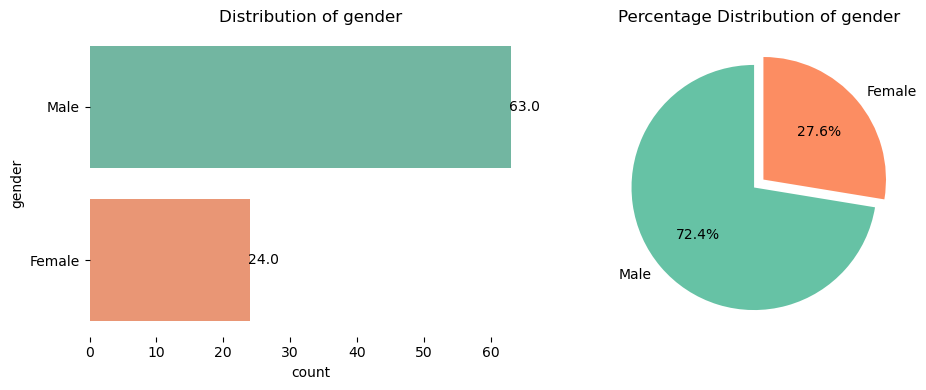

In [22]:
# for the 'gender' column
plot_categorical_distribution('gender')

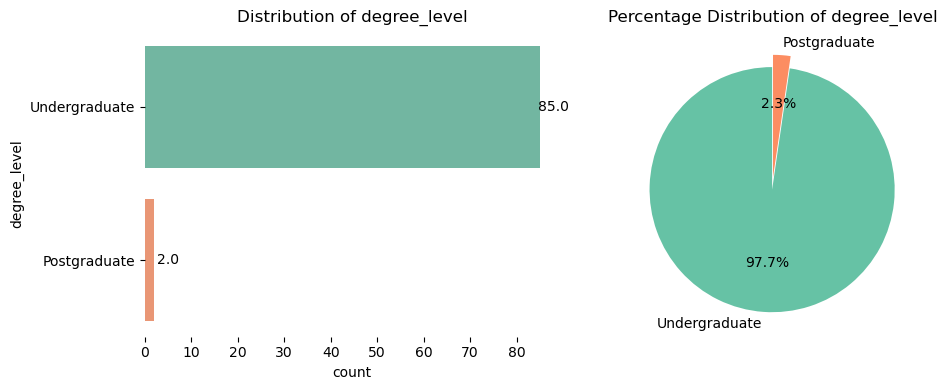

In [23]:
# for the 'degree_level' column
plot_categorical_distribution('degree_level')

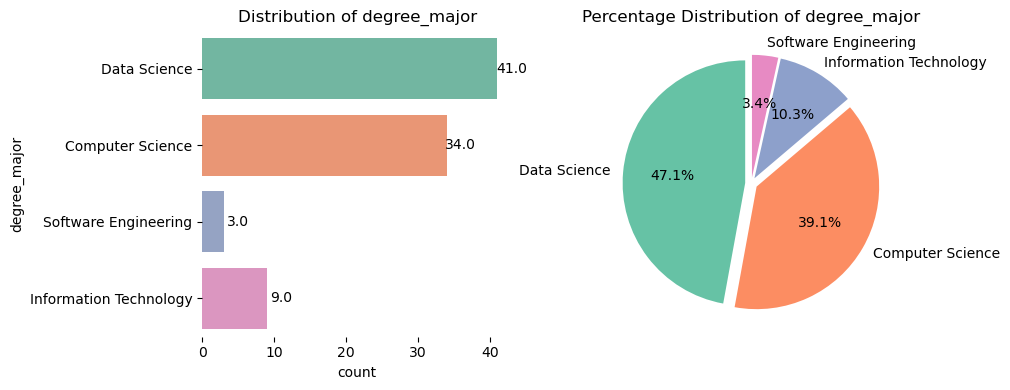

In [24]:
# for the 'degree_major' column
plot_categorical_distribution('degree_major')

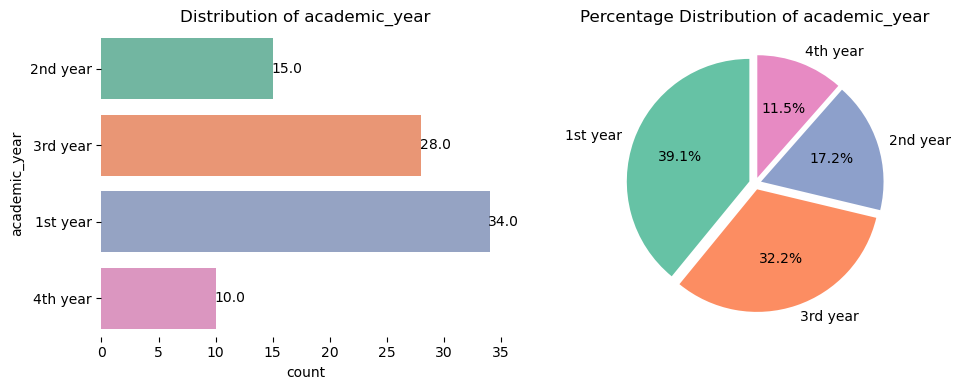

In [25]:
# for the 'academic_year' column
plot_categorical_distribution('academic_year')

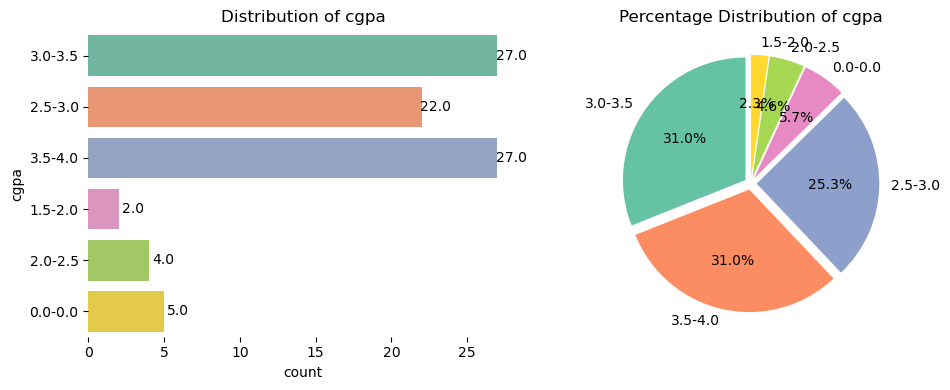

In [26]:
# for the 'cgpa' column
plot_categorical_distribution('cgpa')

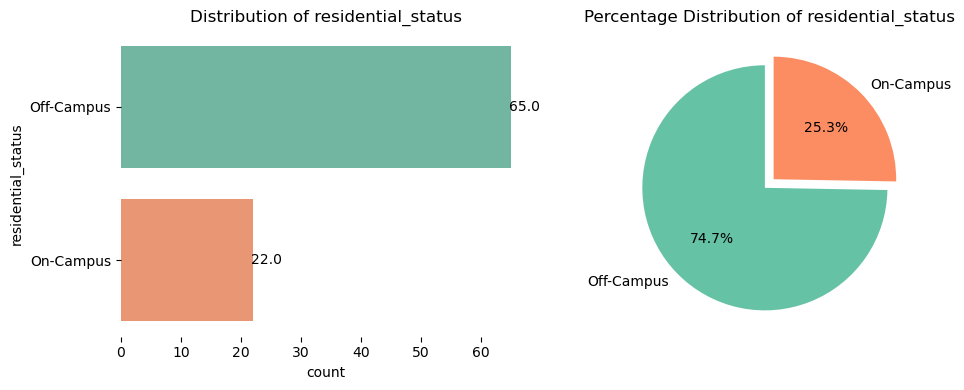

In [27]:
# for the 'residential_status' column
plot_categorical_distribution('residential_status')

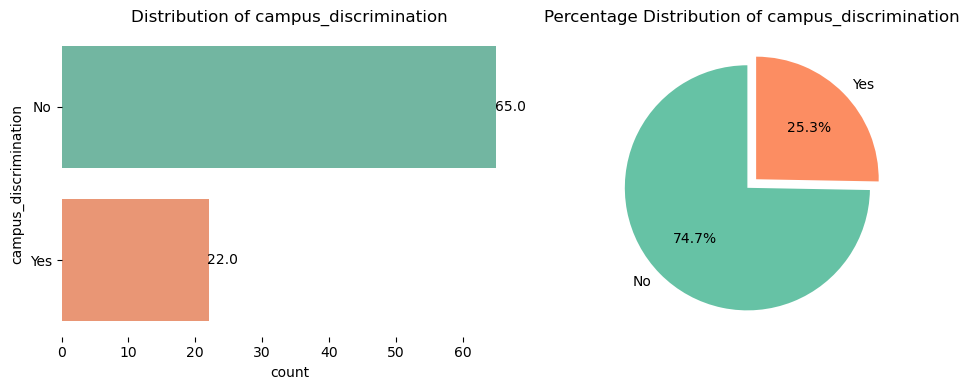

In [28]:
# for the 'campus_discrimination' column
plot_categorical_distribution('campus_discrimination')

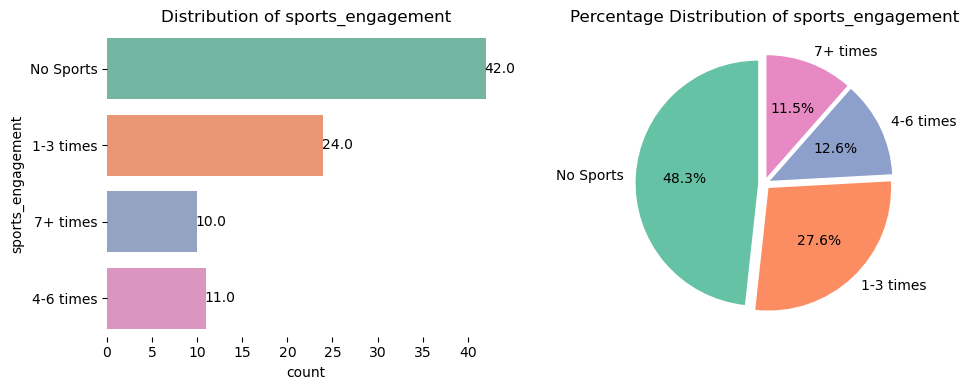

In [29]:
# for the 'sports_engagement' column
plot_categorical_distribution('sports_engagement')

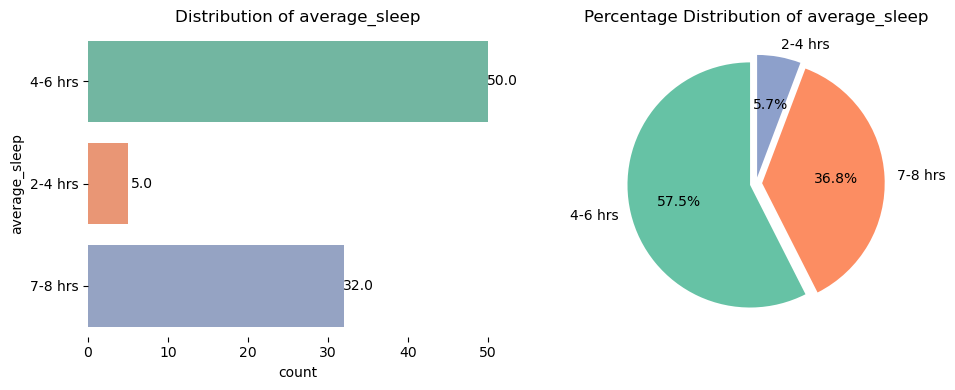

In [30]:
# for the 'average_sleep' column
plot_categorical_distribution('average_sleep')

In [31]:
def horizontal_countplot_with_percentage(column_name):
    plt.figure(figsize=(12, 8))
    
    ax = sns.countplot(y=column_name, data=mental_health_data, palette='Set2')
    
    total = len(mental_health_data[column_name])
    
    for p in ax.patches:
        percentage = 100 * p.get_width() / total
        count = int(p.get_width())
        ax.annotate(f'{count}({percentage:.1f}%)', 
                    (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center', fontsize=10, color='black', 
                    xytext=(5, 0), textcoords='offset points')

    plt.title(f'Distribution of {column_name} (Count & Percentage)', fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(column_name, fontsize=12)
    
    plt.tight_layout()
    plt.show()

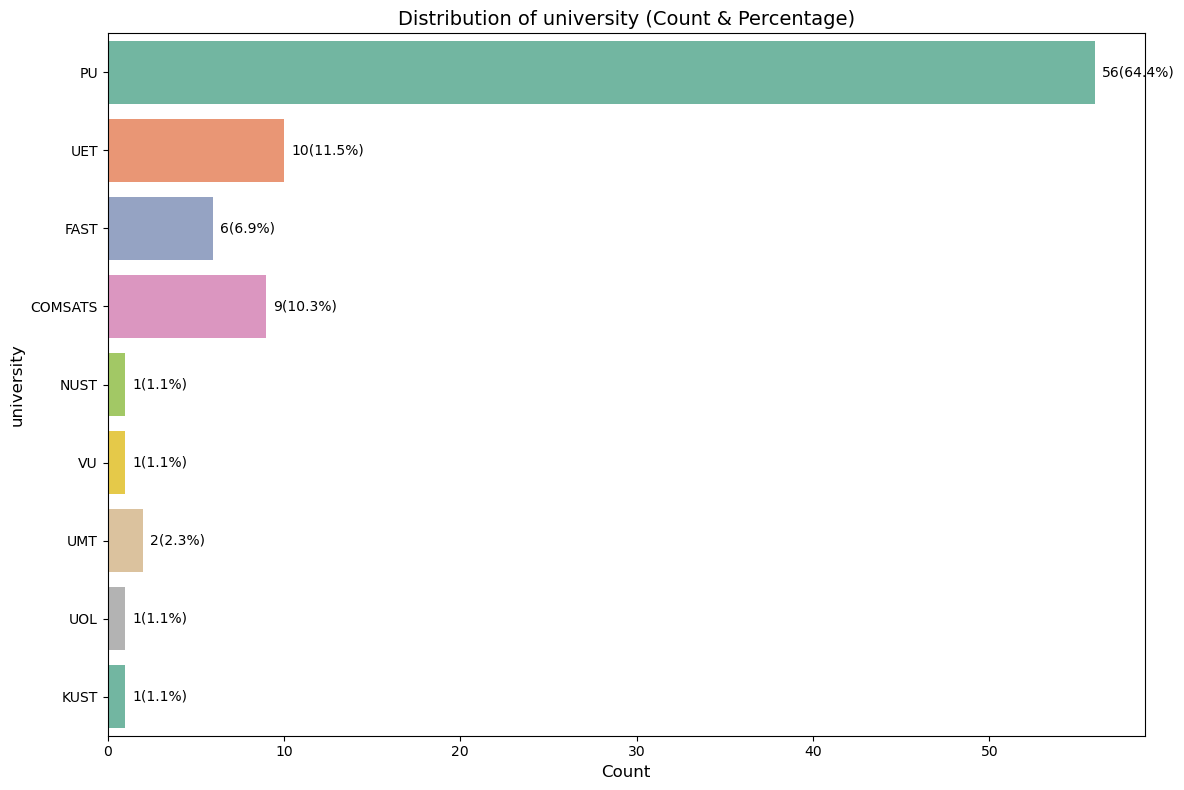

In [32]:
horizontal_countplot_with_percentage('university')

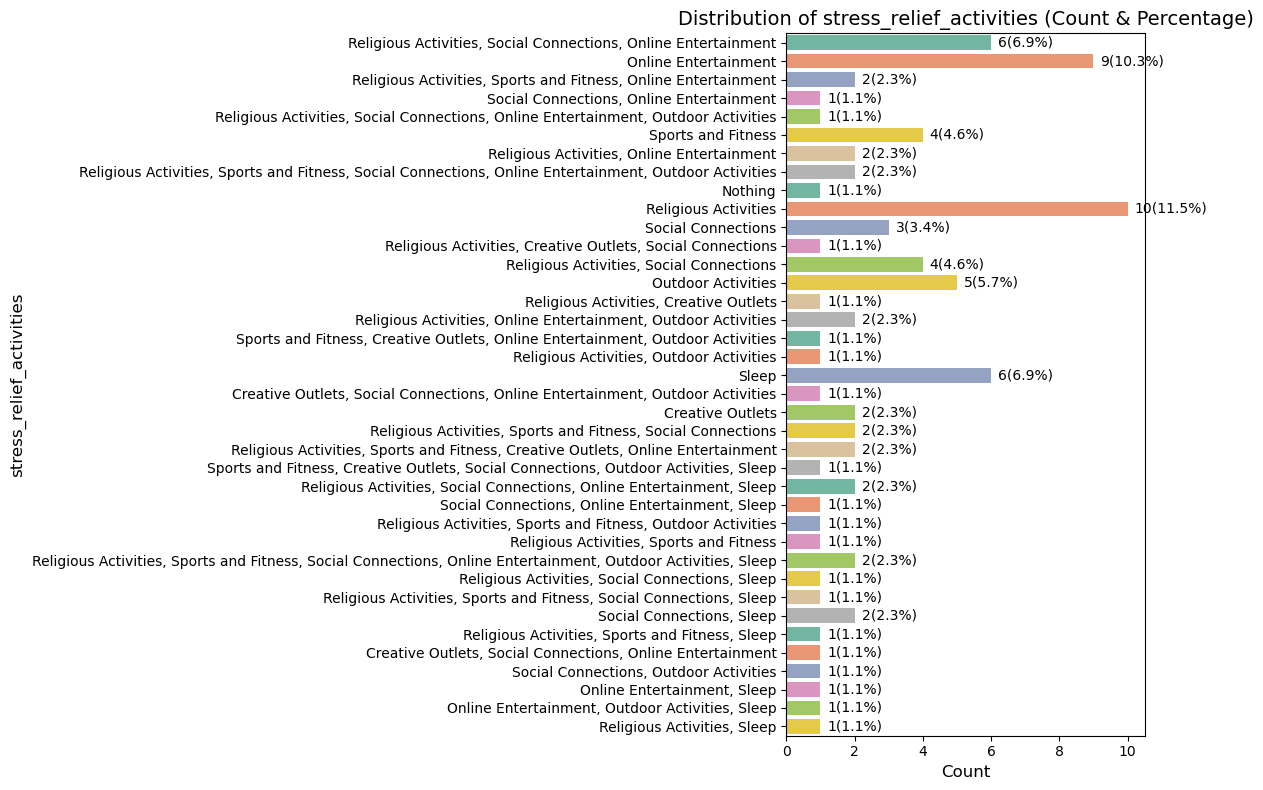

In [33]:
horizontal_countplot_with_percentage('stress_relief_activities')

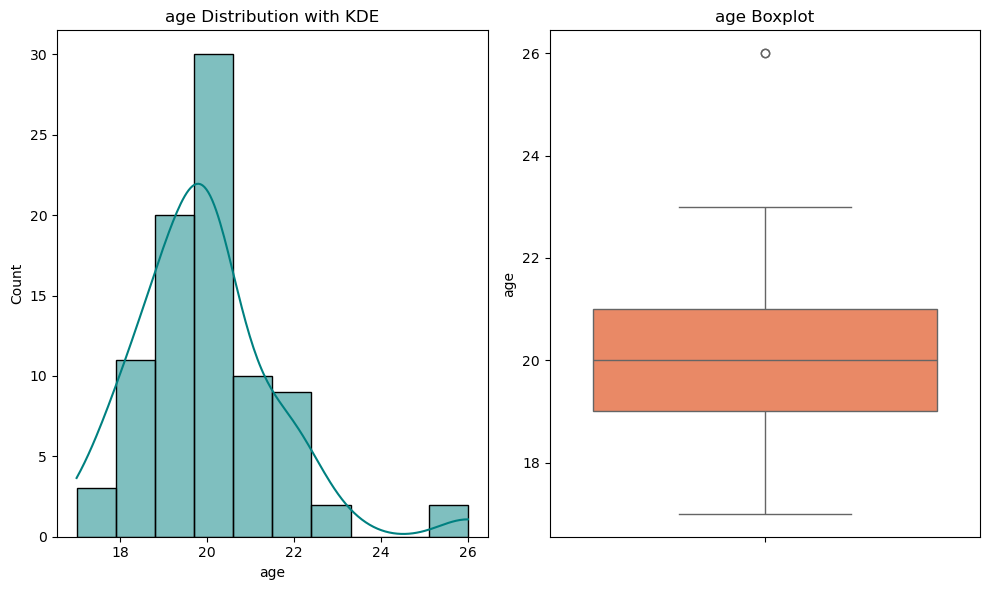


Summary Statistics for age:
 count    87.000000
mean     19.942529
std       1.623636
min      17.000000
25%      19.000000
50%      20.000000
75%      21.000000
max      26.000000
Name: age, dtype: float64


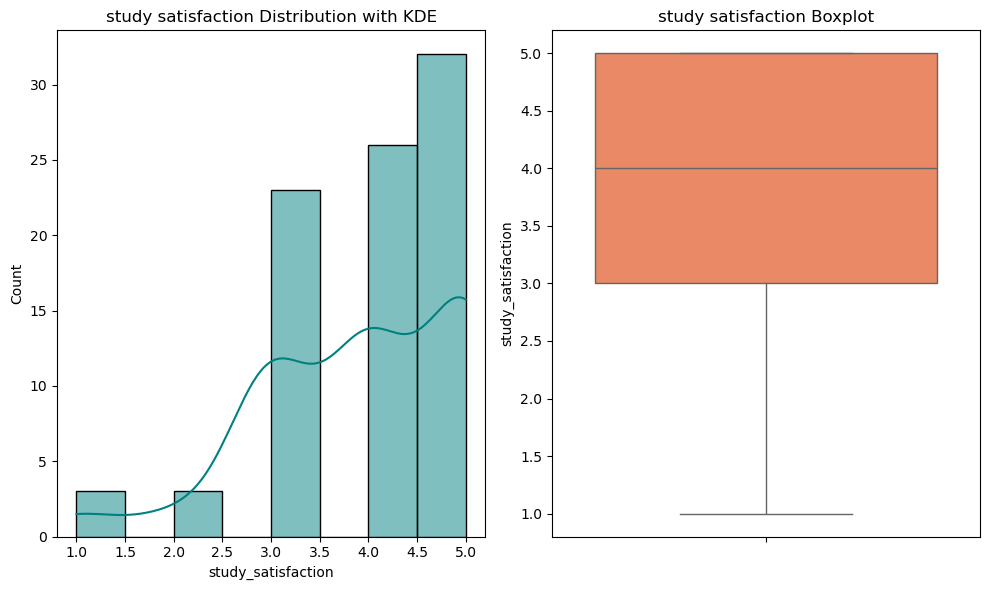


Summary Statistics for study satisfaction:
 count    87.000000
mean      3.931034
std       1.043174
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: study_satisfaction, dtype: float64


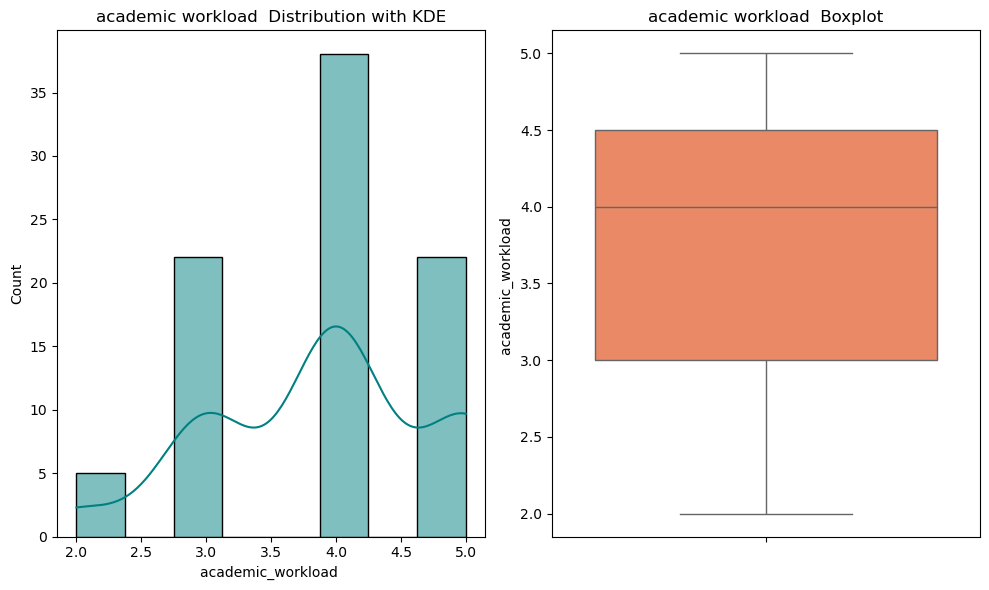


Summary Statistics for academic workload :
 count    87.000000
mean      3.885057
std       0.854880
min       2.000000
25%       3.000000
50%       4.000000
75%       4.500000
max       5.000000
Name: academic_workload , dtype: float64


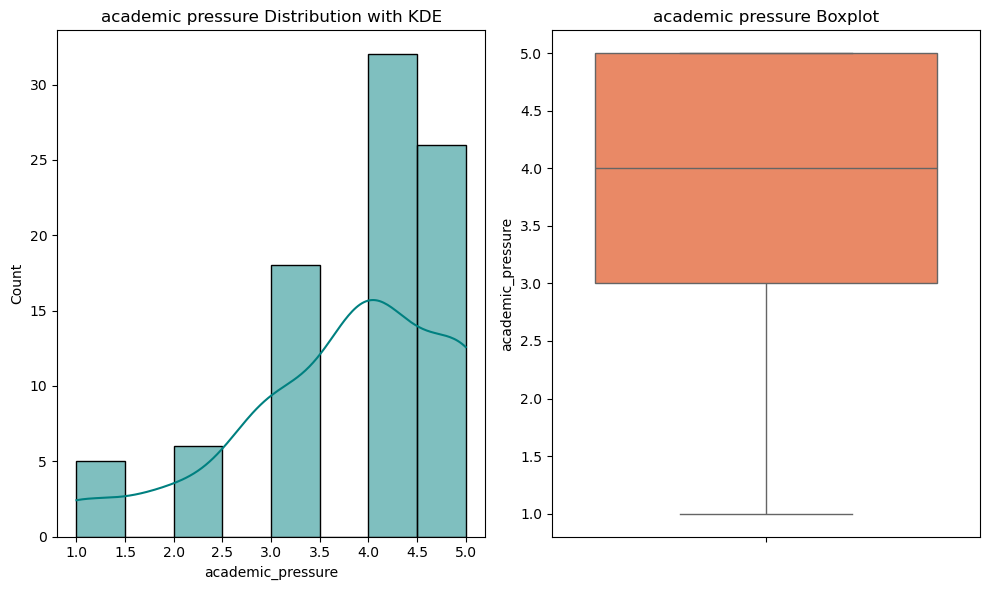


Summary Statistics for academic pressure:
 count    87.000000
mean      3.781609
std       1.125035
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: academic_pressure, dtype: float64


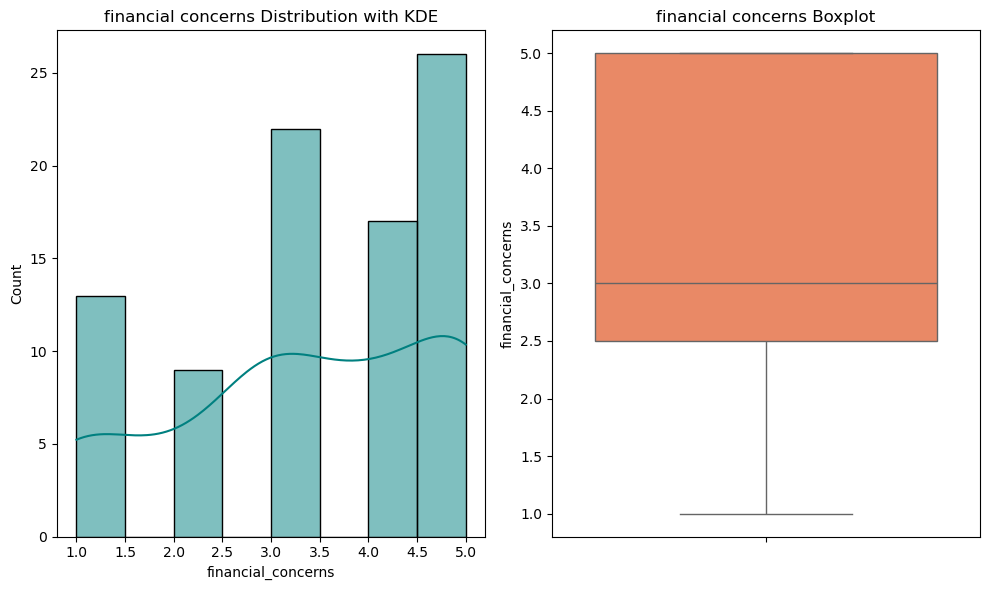


Summary Statistics for financial concerns:
 count    87.000000
mean      3.390805
std       1.400634
min       1.000000
25%       2.500000
50%       3.000000
75%       5.000000
max       5.000000
Name: financial_concerns, dtype: float64


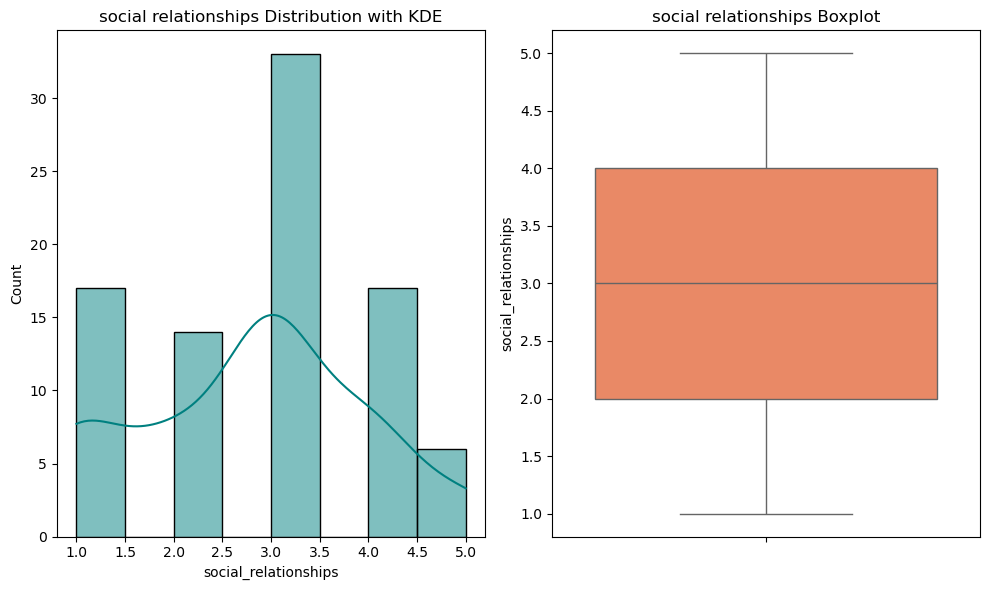


Summary Statistics for social relationships:
 count    87.000000
mean      2.781609
std       1.175578
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: social_relationships, dtype: float64


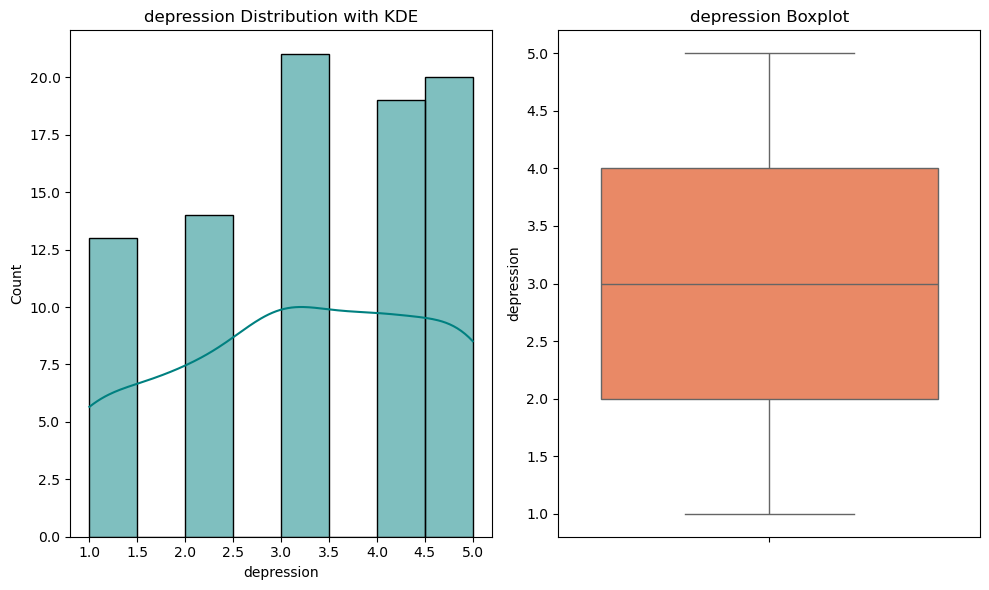


Summary Statistics for depression:
 count    87.000000
mean      3.218391
std       1.367609
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: depression, dtype: float64


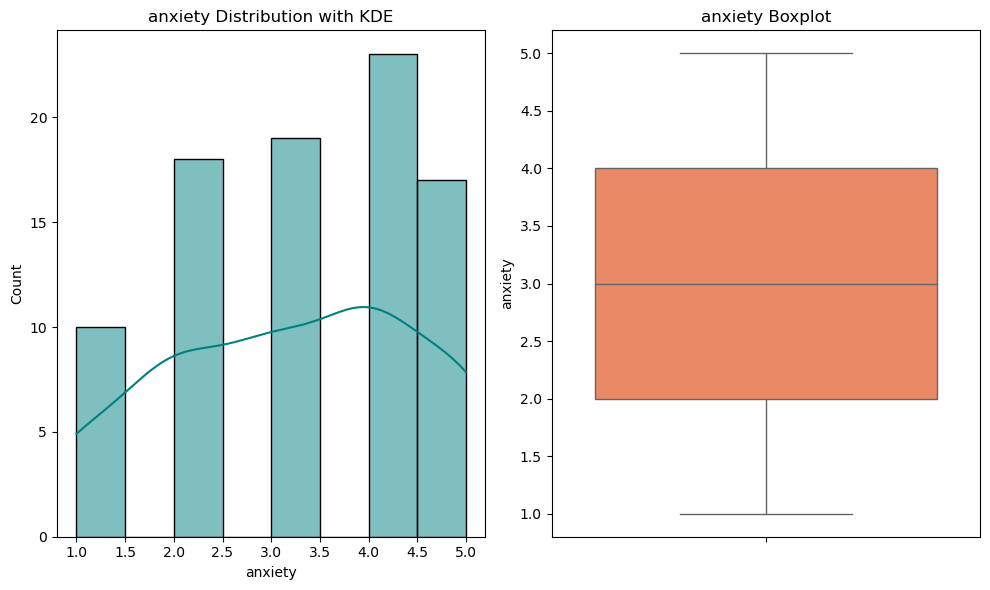


Summary Statistics for anxiety:
 count    87.000000
mean      3.218391
std       1.297809
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: anxiety, dtype: float64


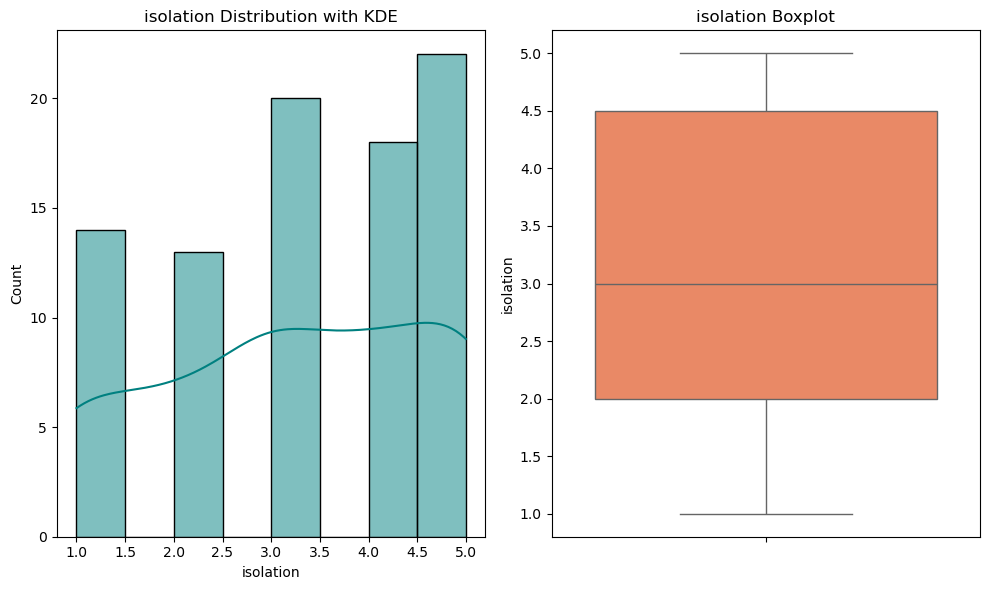


Summary Statistics for isolation:
 count    87.000000
mean      3.241379
std       1.405682
min       1.000000
25%       2.000000
50%       3.000000
75%       4.500000
max       5.000000
Name: isolation, dtype: float64


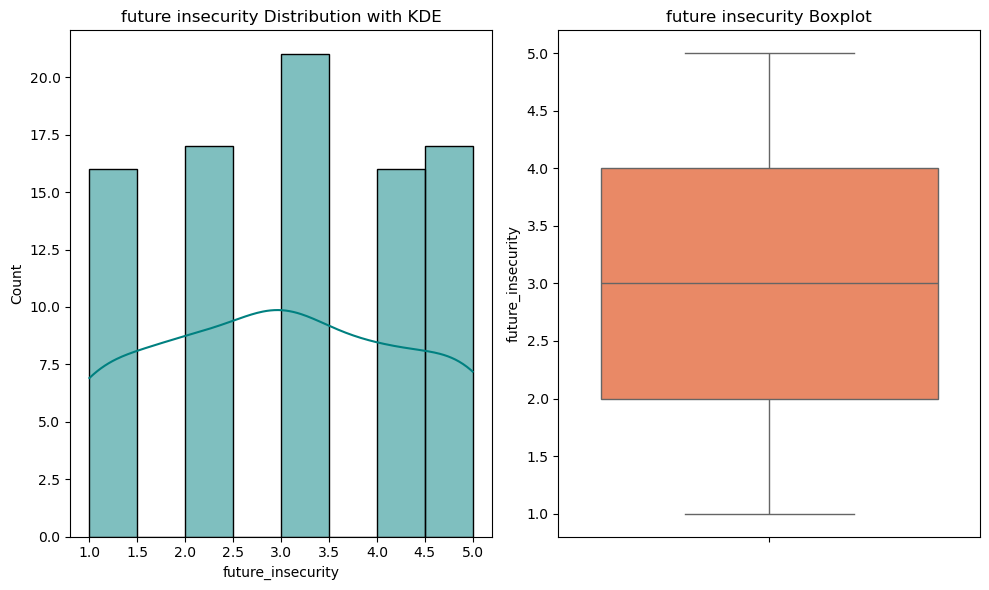


Summary Statistics for future insecurity:
 count    87.000000
mean      3.011494
std       1.385089
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: future_insecurity, dtype: float64


In [34]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True, color='teal')
    plt.title(f'{title} Distribution with KDE')

    plt.subplot(1, 2, 2)
    sns.boxplot(data[column], color='coral')
    plt.title(f'{title} Boxplot')

    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyze = ['age', 'study_satisfaction', 'academic_workload ', 'academic_pressure', 'financial_concerns', 'social_relationships', 'depression', 'anxiety', 'isolation', 'future_insecurity']

for column in columns_to_analyze:
    univariate_analysis(mental_health_data, column, column.replace('_', ' '))

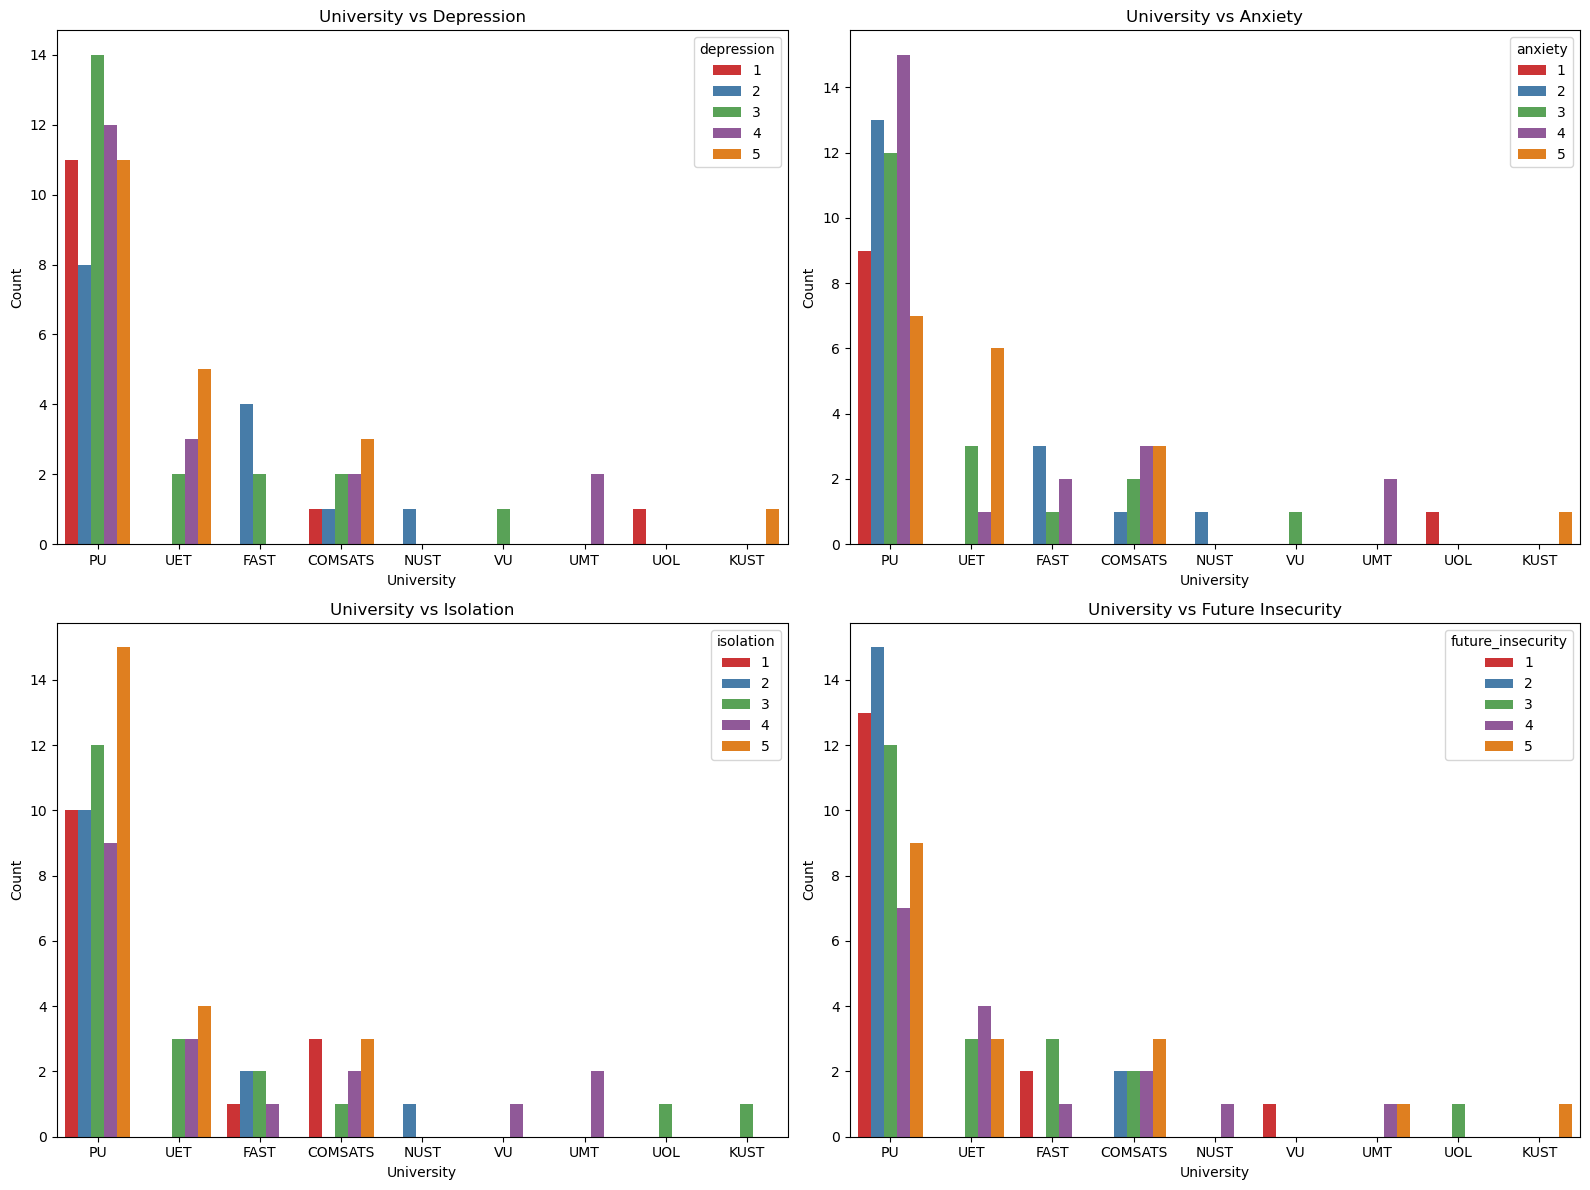

In [35]:
# 4. Bivariate Analysis
# Bivariate analysis for 'university' vs mental health and well-being variables
# Using count plots to show the distribution of depression, anxiety, isolation, and future insecurity across university

mental_health_vars = ['depression', 'anxiety', 'isolation', 'future_insecurity']

plt.figure(figsize=(16, 12))

for i, var in enumerate(mental_health_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x='university', hue=var, data=mental_health_data, palette='Set1')
    plt.title(f'University vs {var.replace("_", " ").title()}')
    plt.xlabel('University')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

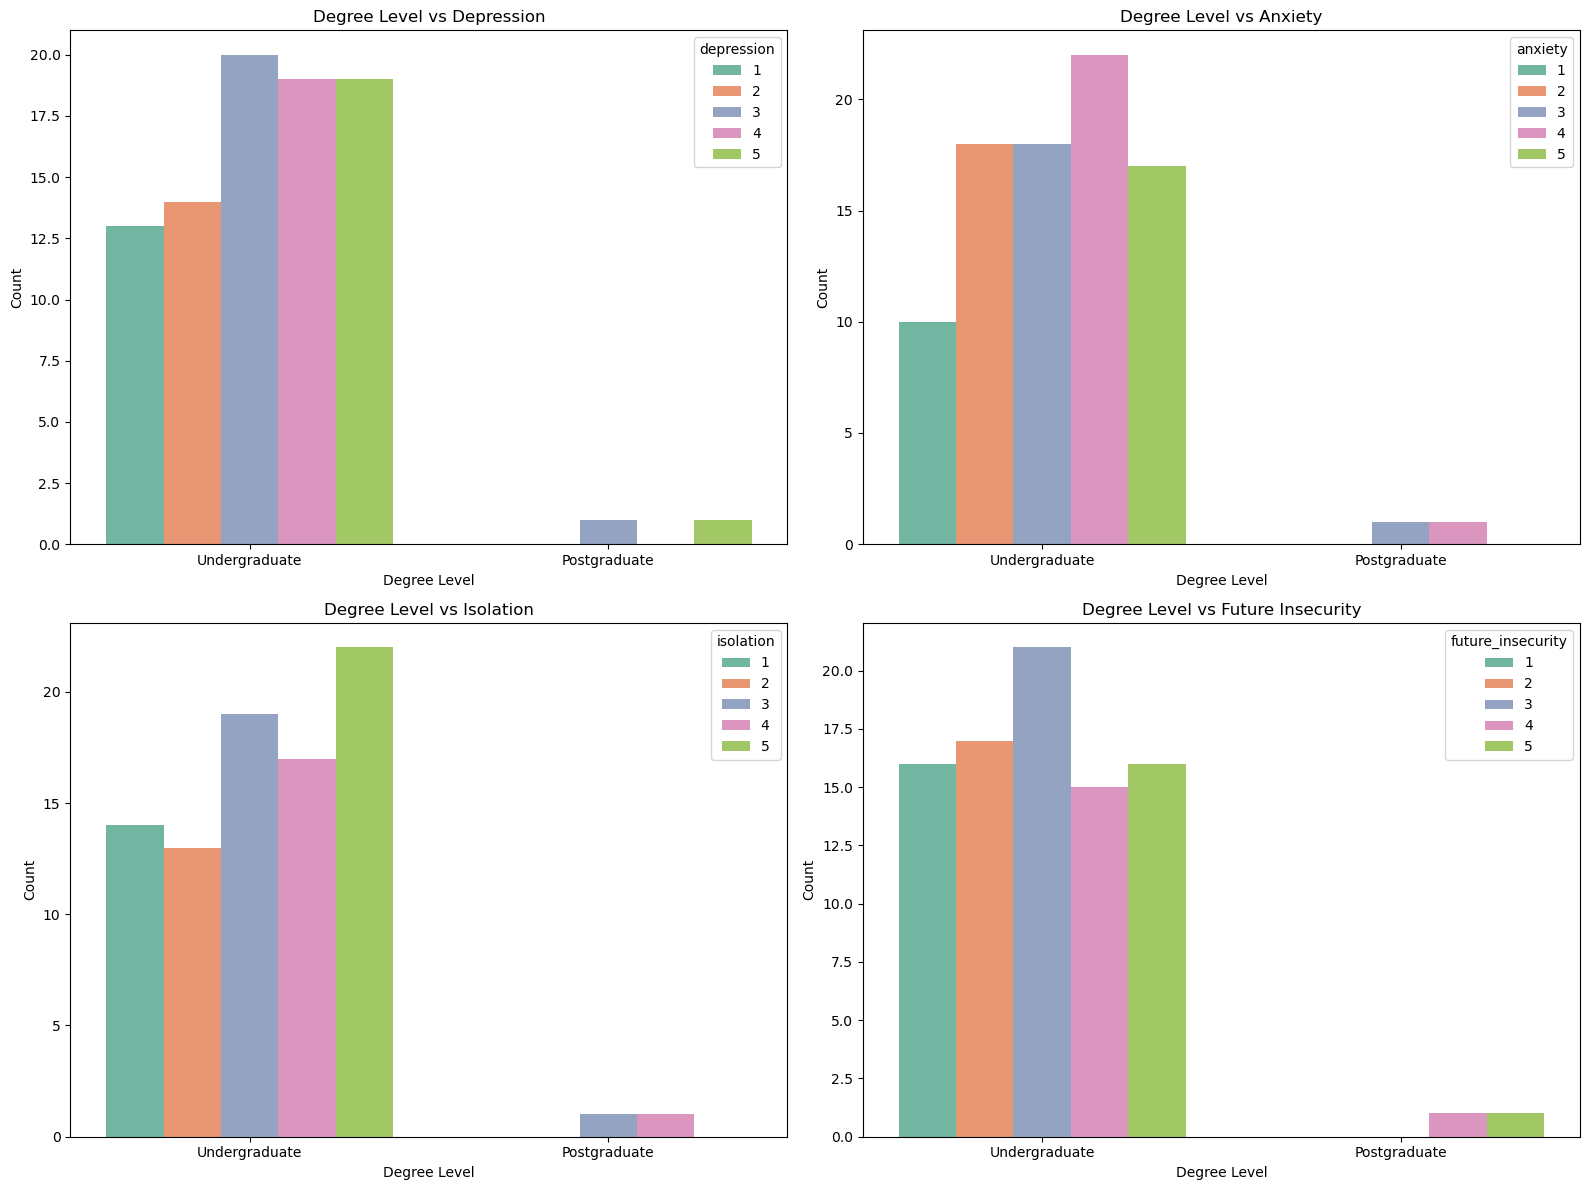

In [36]:
# Bivariate analysis for 'degree_level' vs mental health and well-being variables using count plots
plt.figure(figsize=(16, 12))

# Creating count plots for each variable
for i, var in enumerate(mental_health_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x='degree_level', hue=var, data=mental_health_data, palette='Set2')
    plt.title(f'Degree Level vs {var.replace("_", " ").title()}')
    plt.xlabel('Degree Level')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

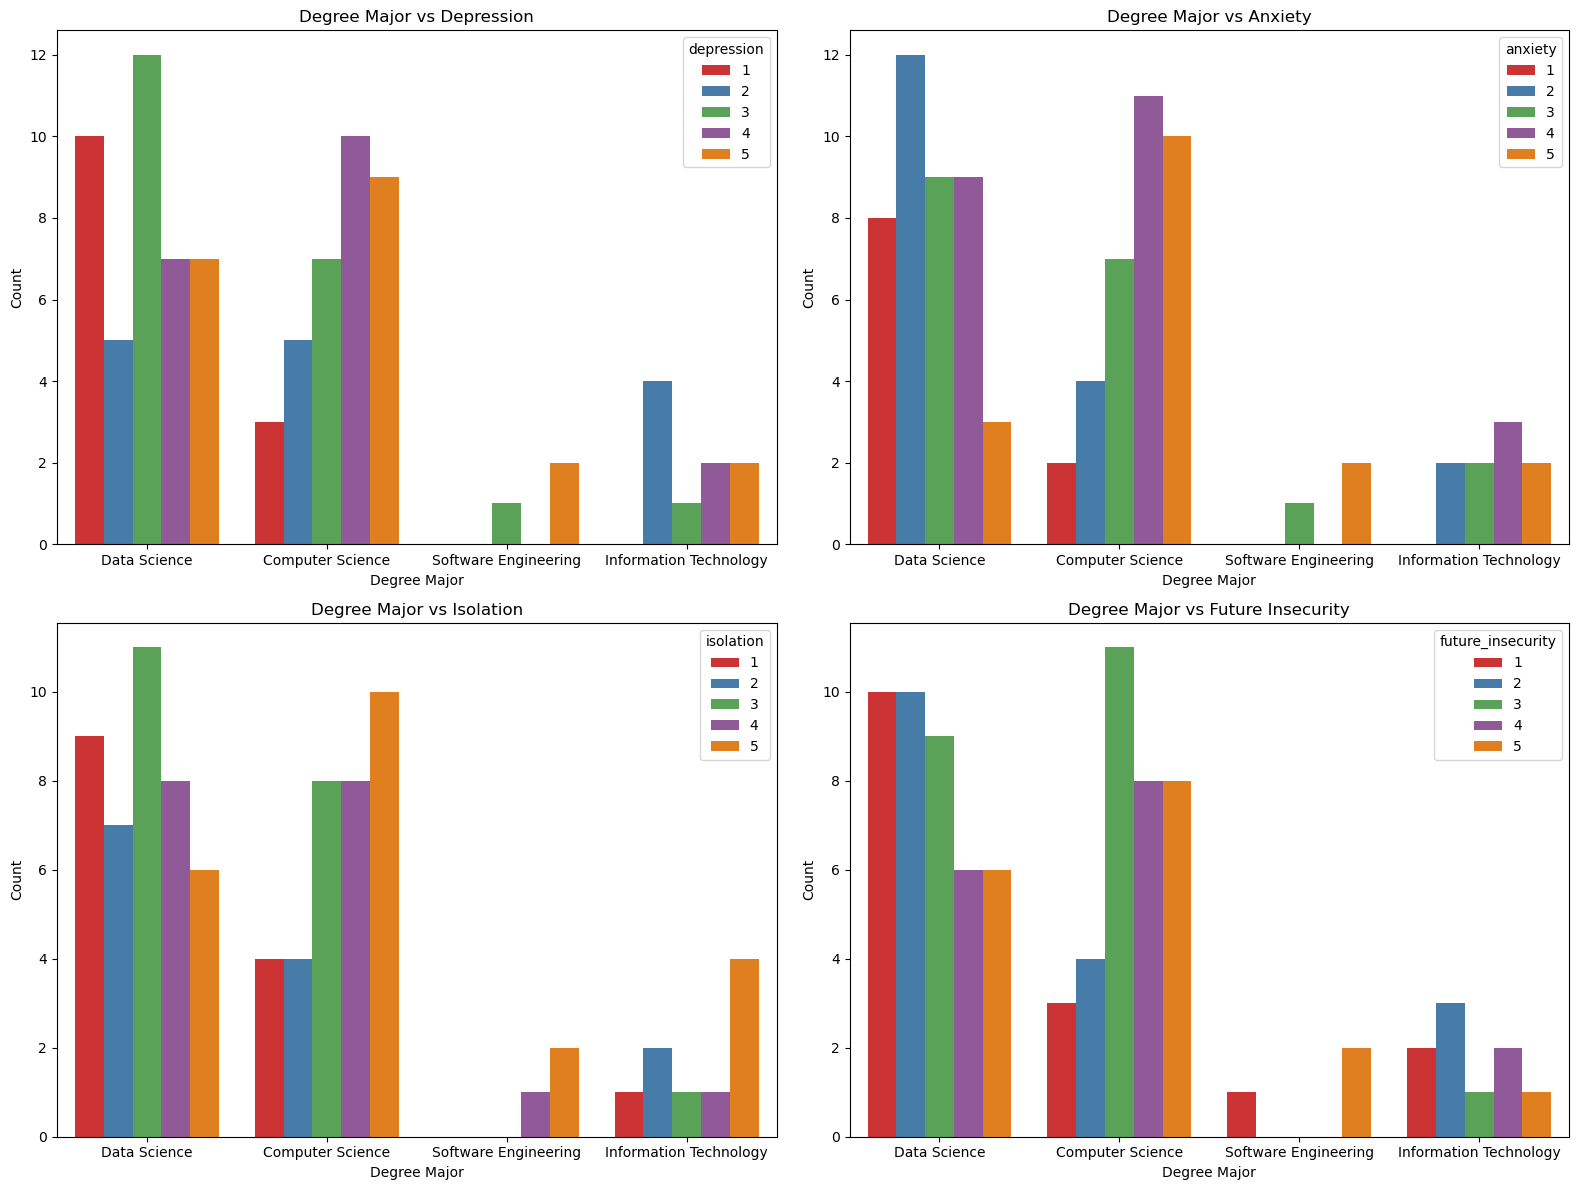

In [37]:
# Bivariate analysis for 'degree_major' vs mental health and well-being variables
plt.figure(figsize=(16, 12))

# Creating count plots for each variable
for i, var in enumerate(mental_health_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x='degree_major', hue=var, data=mental_health_data, palette='Set1')
    plt.title(f'Degree Major vs {var.replace("_", " ").title()}')
    plt.xlabel('Degree Major')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

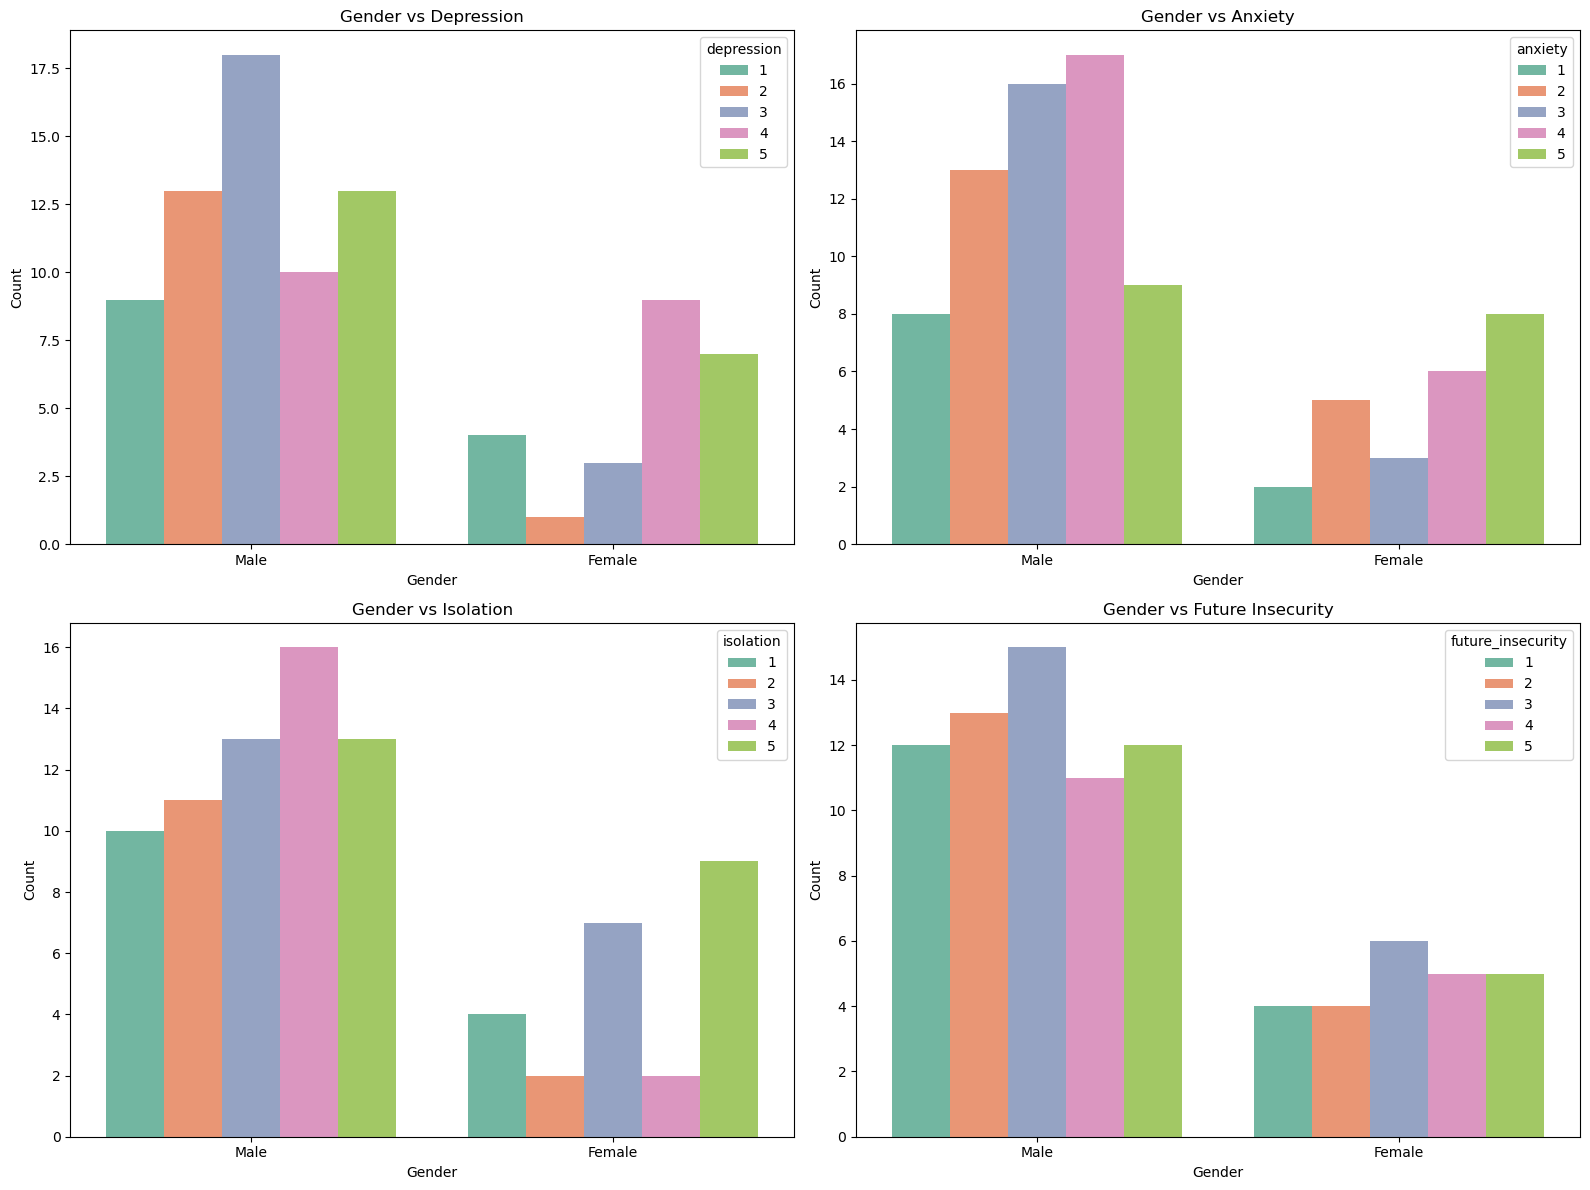

In [38]:
# Bivariate analysis for 'gender' vs mental health and well-being variables using count plots
plt.figure(figsize=(16, 12))

# Creating count plots for each variable
for i, var in enumerate(mental_health_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x='gender', hue=var, data=mental_health_data, palette='Set2')
    plt.title(f'Gender vs {var.replace("_", " ").title()}')
    plt.xlabel('Gender')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [39]:
# Correcting the column name and re-running the analysis
mental_health_data.rename(columns={'academic_workload ': 'academic_workload'}, inplace=True)

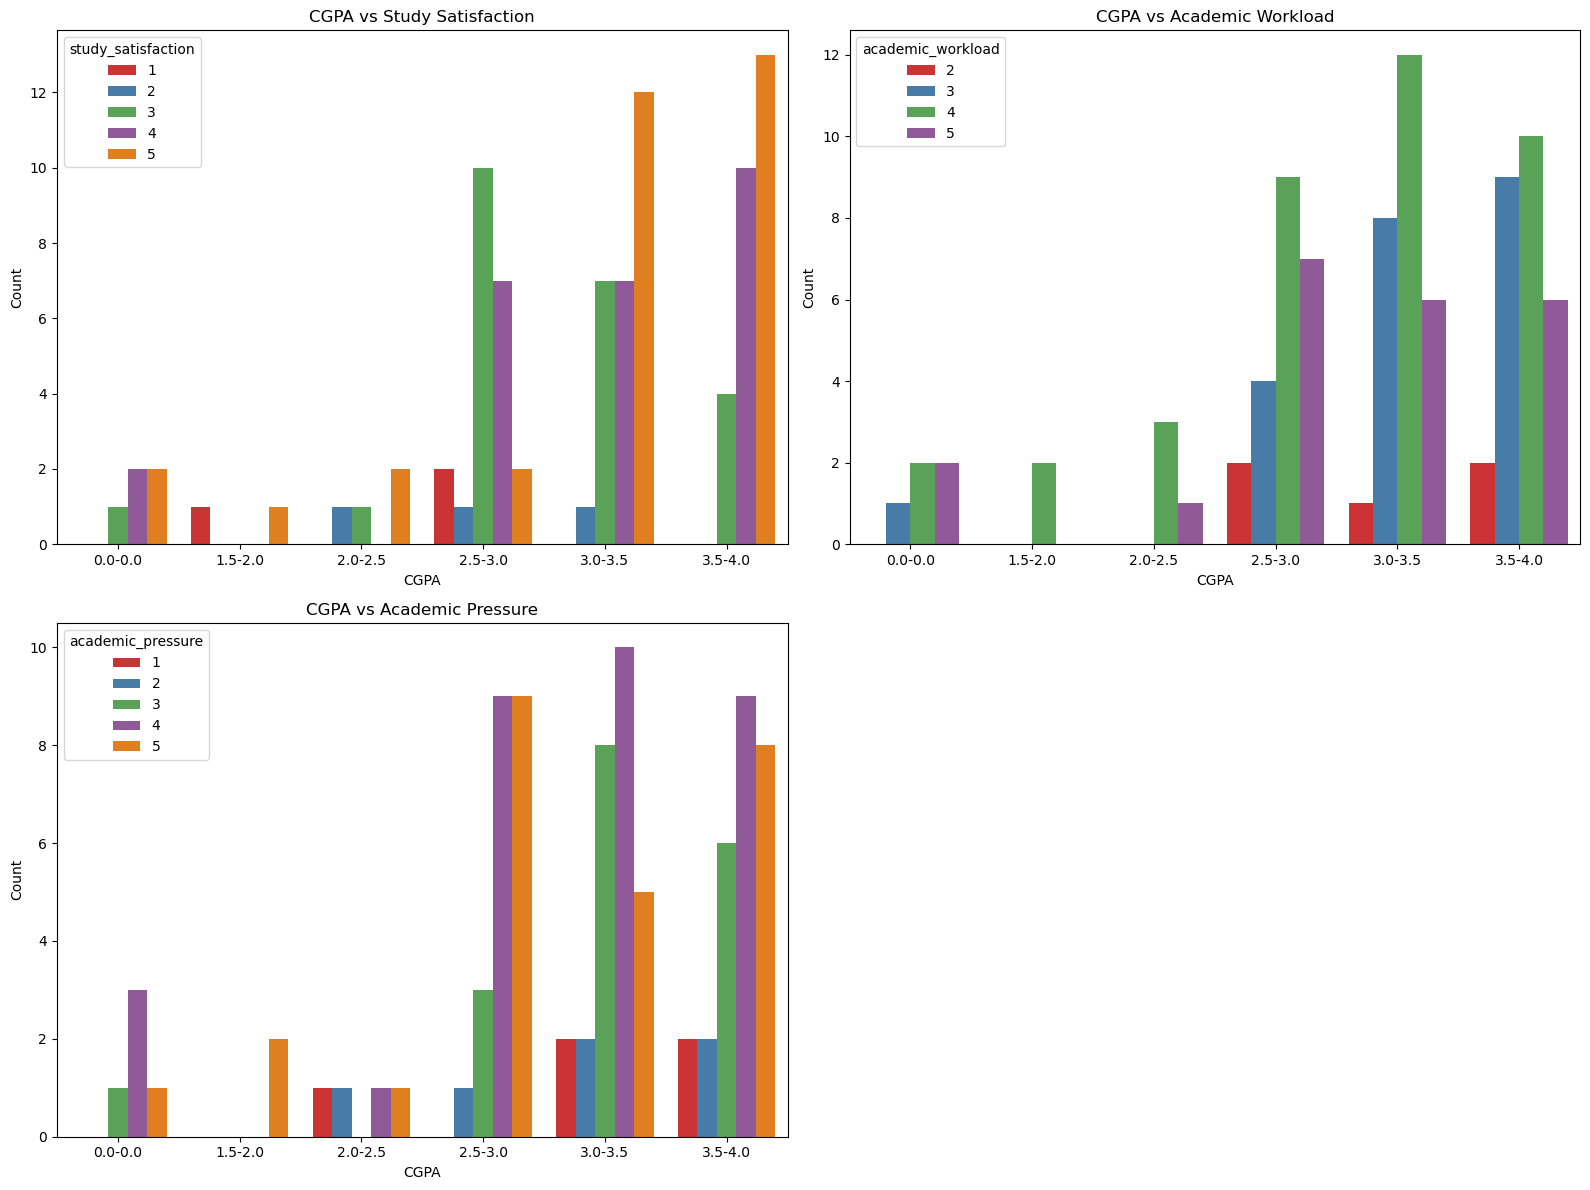

In [40]:
# Bivariate analysis for 'cgpa' vs academic performance variables using count plots

academic_vars = ['study_satisfaction', 'academic_workload', 'academic_pressure']

# Sorting CGPA categories for better visualization
ordered_cgpa = ['0.0-0.0', '1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0']

plt.figure(figsize=(16, 12))

# Creating count plots for each academic variable
for i, var in enumerate(academic_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x='cgpa', hue=var, data=mental_health_data, order=ordered_cgpa, palette='Set1')
    plt.title(f'CGPA vs {var.replace("_", " ").title()}')
    plt.xlabel('CGPA')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


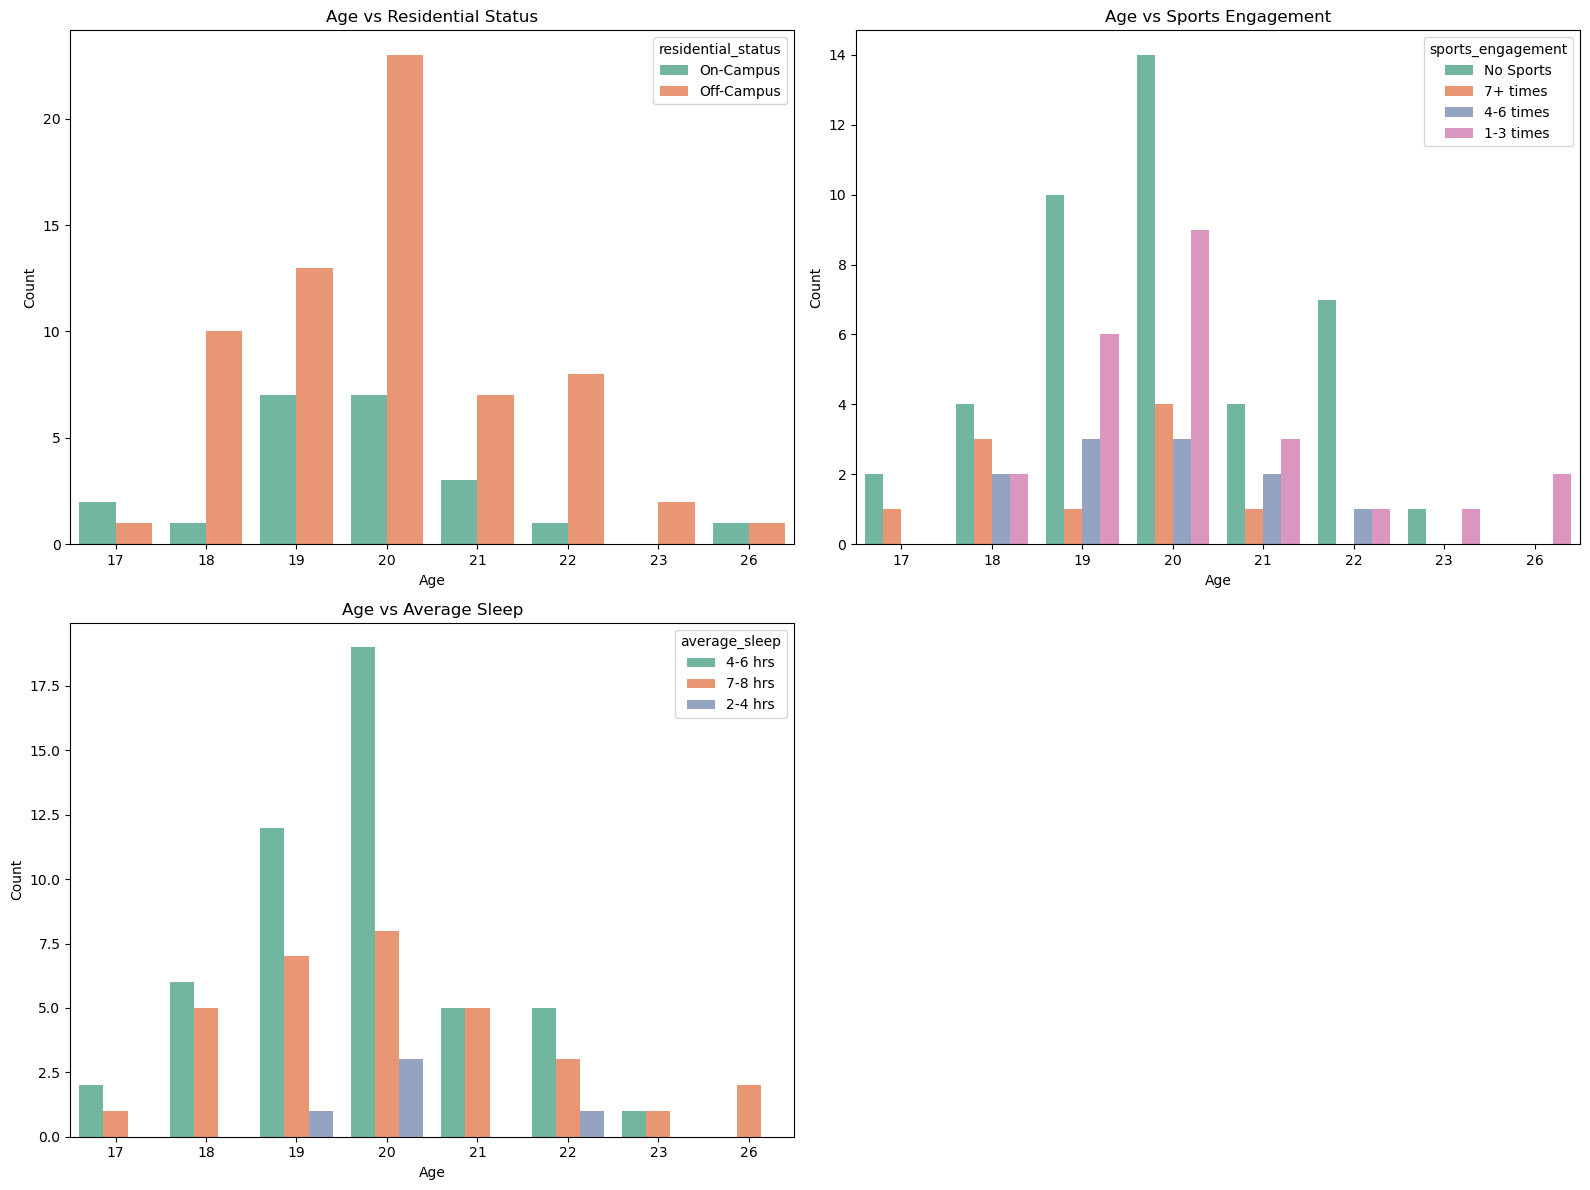

In [41]:
# Bivariate analysis for 'age' vs categorical variables using count plots

categorical_vars = ['residential_status', 'sports_engagement', 'average_sleep']

plt.figure(figsize=(16, 12))

# Creating count plots for each categorical variable
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x='age', hue=var, data=mental_health_data, palette='Set2')
    plt.title(f'Age vs {var.replace("_", " ").title()}')
    plt.xlabel('Age')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


<Axes: xlabel='residential_status', ylabel='age'>

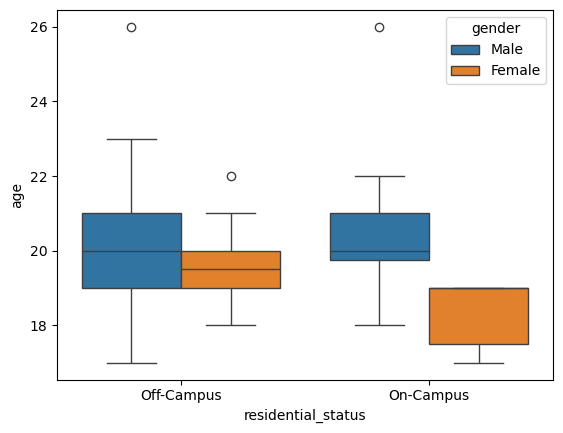

In [42]:
  #5. Multivariate Analysis
sns.boxplot(x='residential_status', y='age', hue='gender', data=mental_health_data)

<Figure size 1800x1200 with 0 Axes>

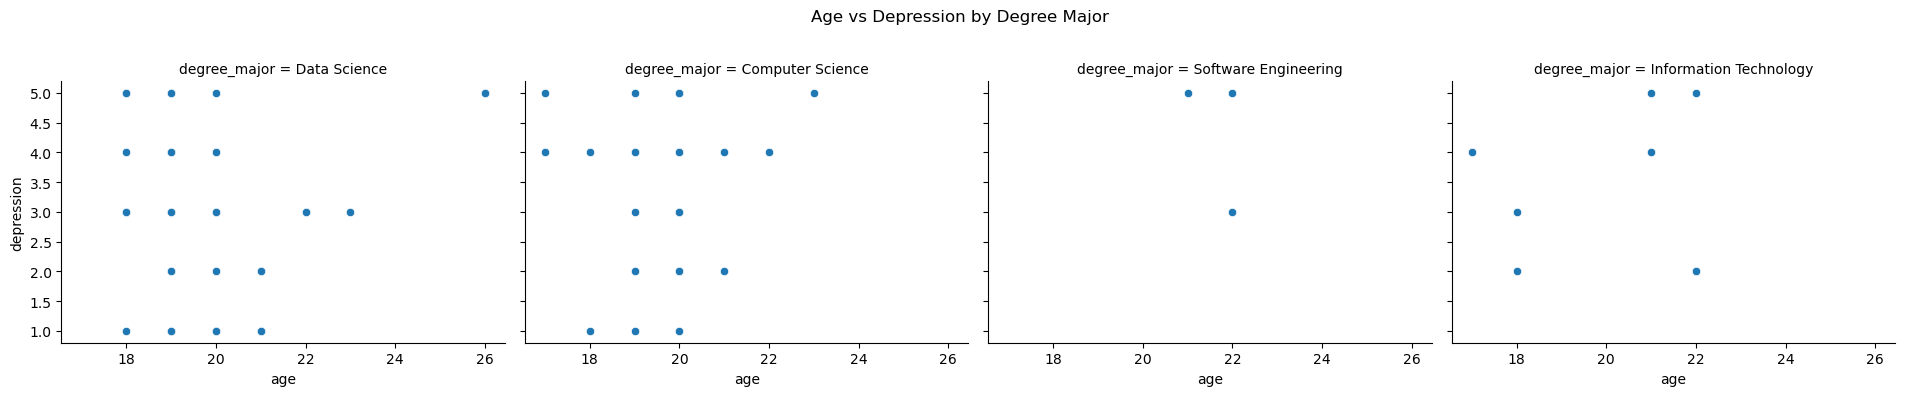

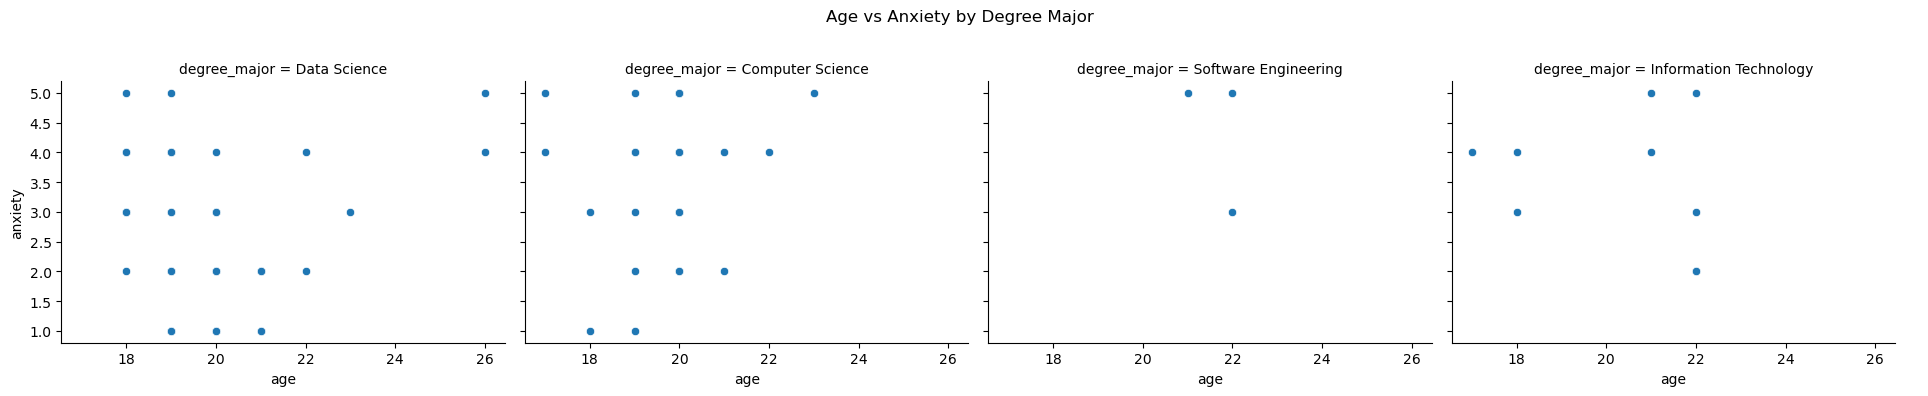

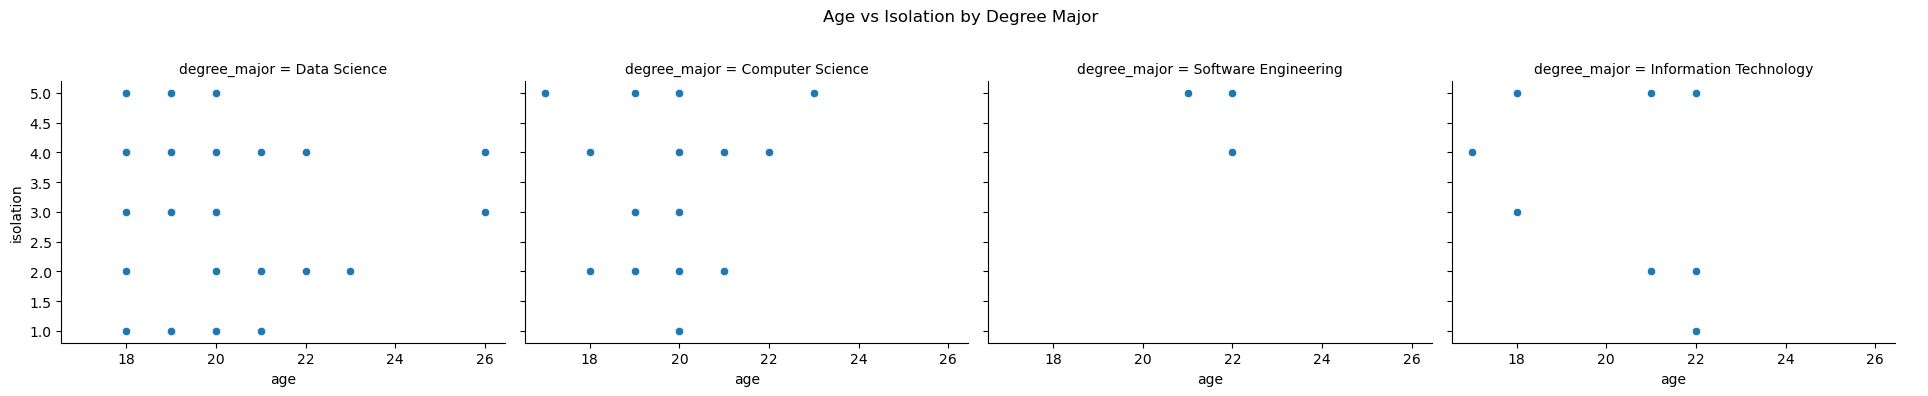

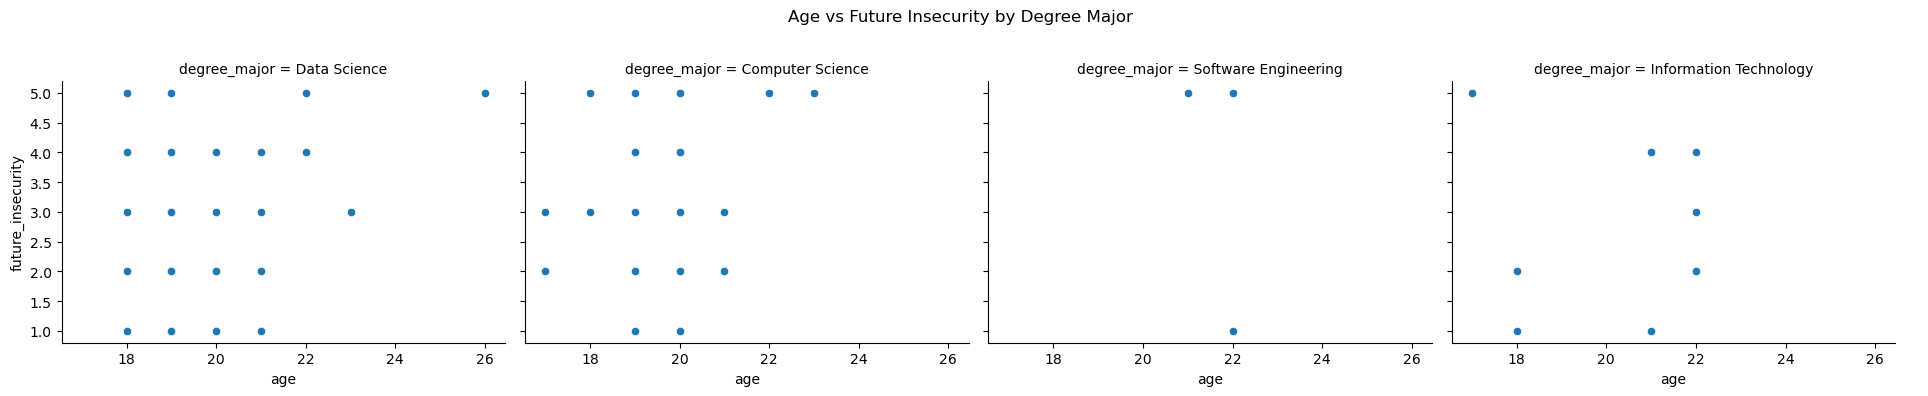

In [43]:
# Multivariate analysis: Age vs Mental Health (depression, anxiety, isolation, future_insecurity) by degree_major using FacetGrid

plt.figure(figsize=(18, 12))

for i, var in enumerate(mental_health_vars, 1):
    g = sns.FacetGrid(mental_health_data, col='degree_major', height=4, aspect=1.2)
    g.map(sns.scatterplot, 'age', var)
    g.add_legend()
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle(f'Age vs {var.replace("_", " ").title()} by Degree Major')
    
plt.show()

<Figure size 1800x1200 with 0 Axes>

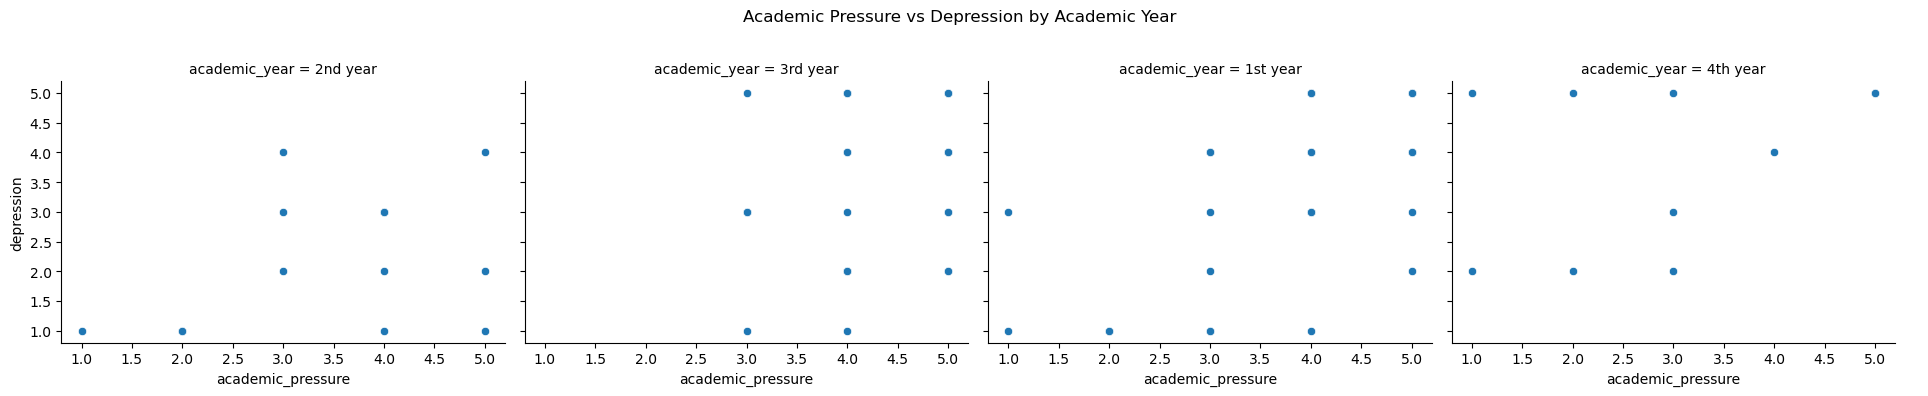

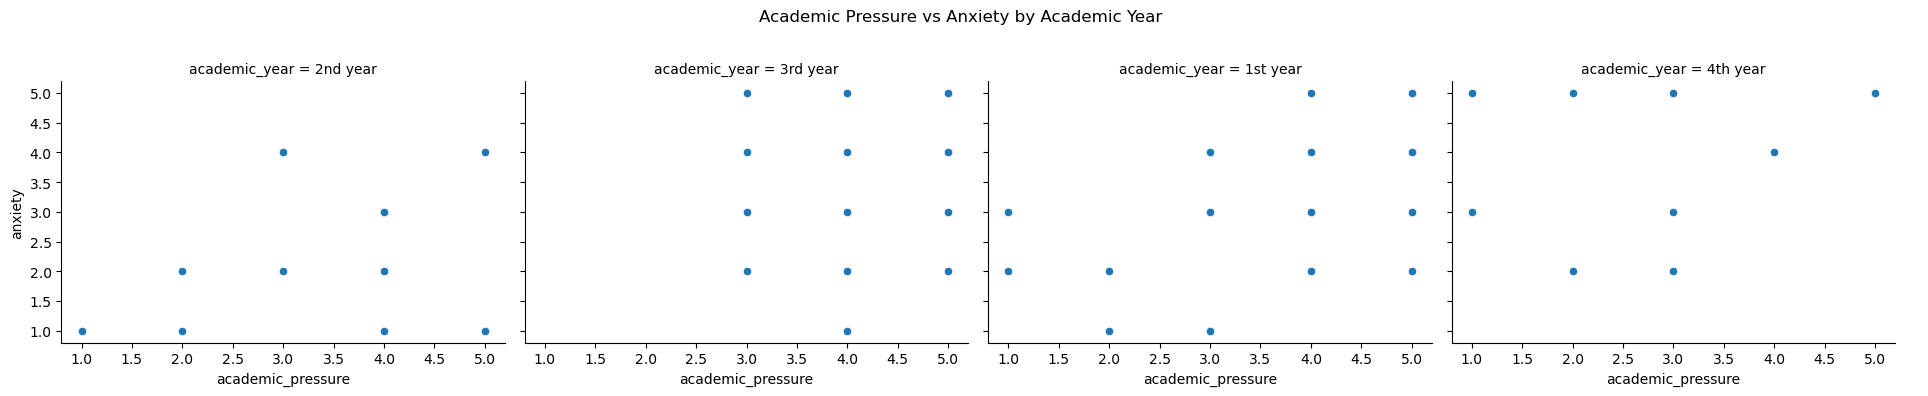

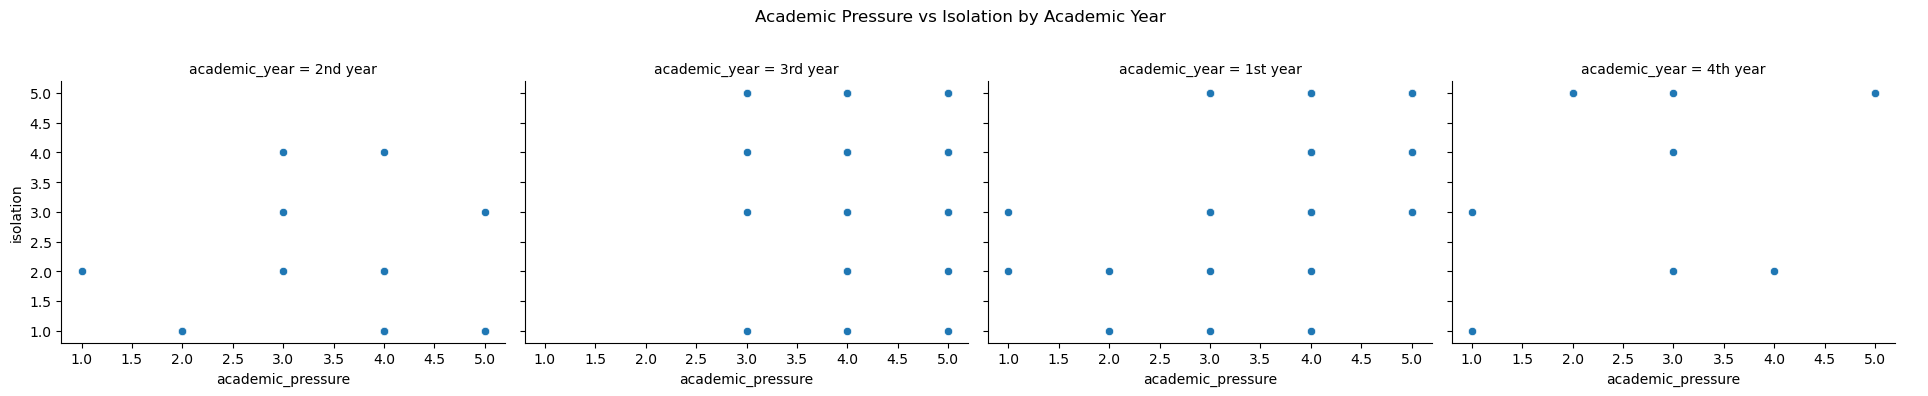

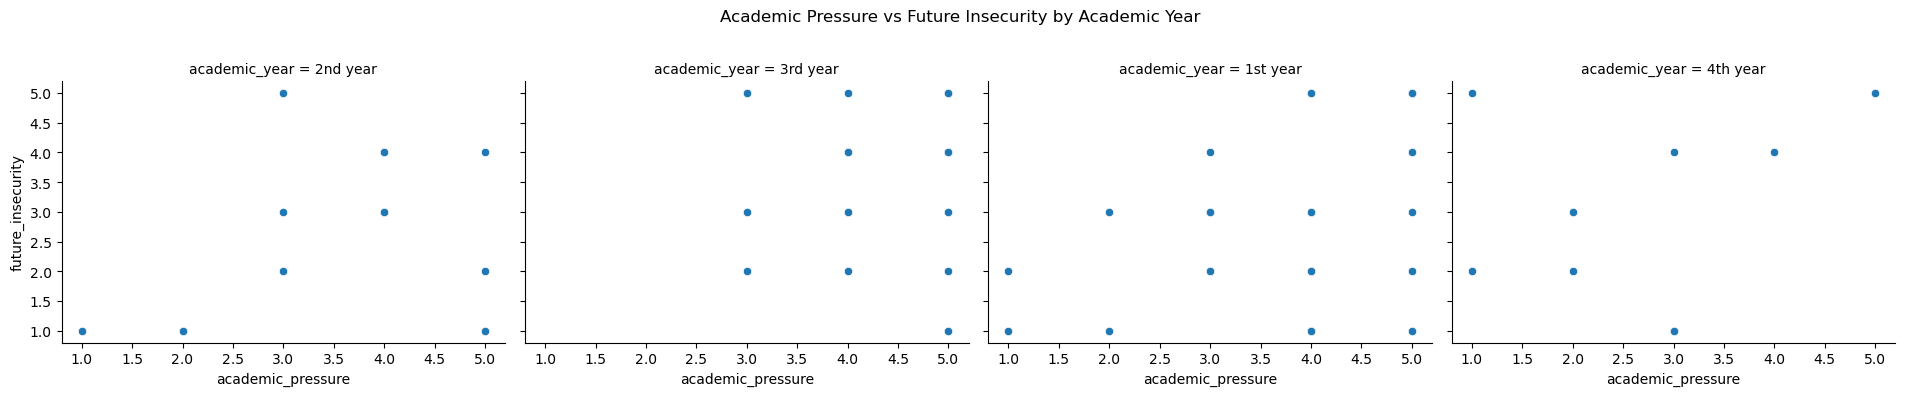

In [44]:
# Multivariate analysis: Academic Pressure vs Mental Health (depression, anxiety, isolation, future_insecurity) by Academic Year using FacetGrid

mental_health_vars = ['depression', 'anxiety', 'isolation', 'future_insecurity']

plt.figure(figsize=(18, 12))

for i, var in enumerate(mental_health_vars, 1):
    g = sns.FacetGrid(mental_health_data, col='academic_year', height=4, aspect=1.2)
    g.map(sns.scatterplot, 'academic_pressure', var)
    g.add_legend()
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle(f'Academic Pressure vs {var.replace("_", " ").title()} by Academic Year')
    
plt.show()

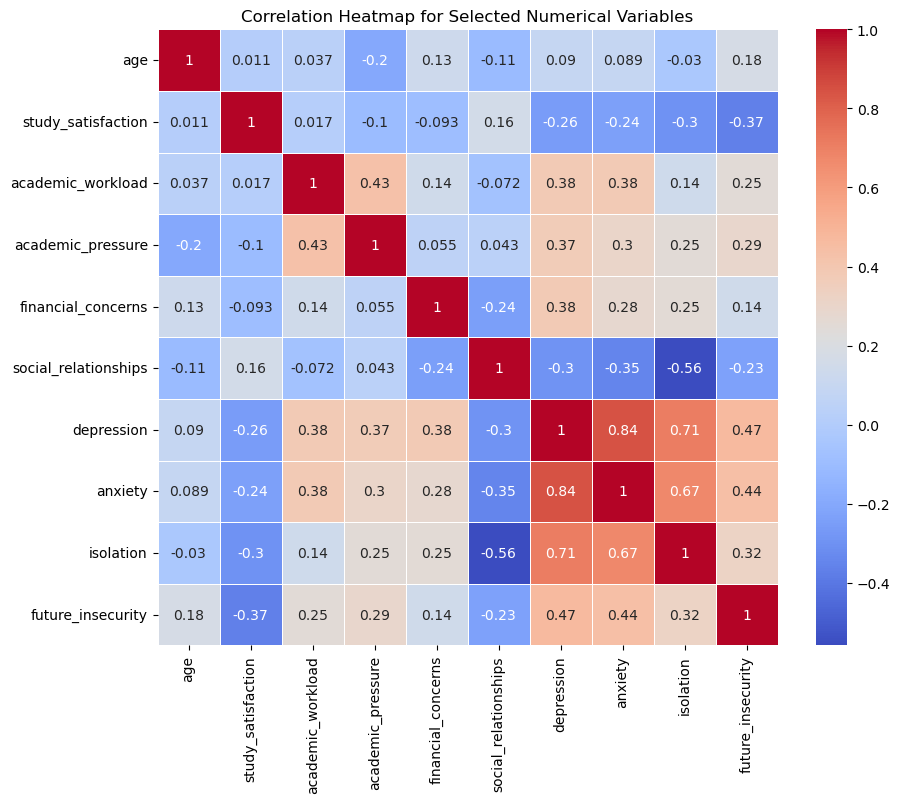

In [45]:
# Creating a correlation heatmap for the specified numerical columns

numerical_columns_for_correlation = ['age', 'study_satisfaction', 'academic_workload', 'academic_pressure', 
                                     'financial_concerns', 'social_relationships', 'depression', 'anxiety', 
                                     'isolation', 'future_insecurity']

correlation_matrix = mental_health_data[numerical_columns_for_correlation].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Selected Numerical Variables')
plt.show()